In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

from datetime import datetime
import regex as re
from PIL import Image

warnings.filterwarnings('ignore')
sns.set_style('ticks')
pd.set_option('display.max_columns', None)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_names = [f'/content/drive/MyDrive/RegressionProject/listings ({i}).csv' for i in range(1, 6)]
dataframes = [pd.read_csv(file_name) for file_name in file_names]
listings = pd.concat(dataframes, ignore_index=True)

In [4]:
len(listings['id'].unique())

49759

In [5]:
# describe_transpose = listings.describe(percentiles=[0.1, 0.25, 0.5, 0.75]).T
# describe_transpose

In [6]:
listings.shape

(204716, 75)

In [7]:
dfs = [(listings ,'listings')]

def basic_eda(df, name):
    print(f"""-----------------------------------------------\n
{name} dataframe \n
Rows: {df.shape[0]}             Columns: {df.shape[1]}
Duplicated rows: {(df.duplicated(keep=False) == True).sum()}
Columns:
{pd.concat([pd.DataFrame(data=df.dtypes, columns=['data_type']),
         pd.DataFrame(data=df.isnull().sum(), columns=['num_nulls'])], axis=1)}
    \n""")
print("DATAFRAME DESCRIPTION")

[basic_eda(df, name) for (df,name) in dfs];

DATAFRAME DESCRIPTION
-----------------------------------------------

listings dataframe 

Rows: 204716             Columns: 75
Duplicated rows: 0
Columns:
                                             data_type  num_nulls
id                                               int64          0
listing_url                                     object          0
scrape_id                                        int64          0
last_scraped                                    object          0
source                                          object          0
name                                            object          0
description                                     object       3081
neighborhood_overview                           object      85747
picture_url                                     object          0
host_id                                          int64          0
host_url                                        object          0
host_name                                       obj

In [8]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name','neighborhood_overview',\
                'picture_url', \
                'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url',\
                'host_picture_url', 'host_neighbourhood', 'host_total_listings_count','host_verifications',\
                'host_has_profile_pic', 'neighbourhood','minimum_minimum_nights',\
                'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm',\
                'maximum_nights_avg_ntm','calendar_updated','license','calendar_last_scraped',
                'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
listings = listings.drop(cols_to_drop, axis=1)

In [9]:
print(sum((listings.host_listings_count == listings.calculated_host_listings_count) == False))
listings.loc[((listings.host_listings_count == listings.calculated_host_listings_count) == False)][:3]

52323


id       source                                        description  \
5    2595  city scrape  Beautiful, spacious skylit studio in the heart...   
6   12940  city scrape  Super cute 1 bedroom apartment in a 100 year o...   
13   6990  city scrape  Beautiful peaceful healthy home<br /><br /><b>...   

    host_id  host_since  host_response_time host_response_rate  \
5      2845  2008-09-09        within a day                71%   
6     50148  2009-10-31        within a day                82%   
13    16800  2009-05-12  within a few hours               100%   

   host_acceptance_rate host_is_superhost  host_listings_count  \
5                   21%                 f                  7.0   
6                   91%                 f                  6.0   
13                 100%                 t                  2.0   

   host_identity_verified neighbourhood_cleansed neighbourhood_group_cleansed  \
5                       t                Midtown                    Manhattan   
6                       t     Bedford-Stuyvesant                     Brooklyn   
13                      t            East Harlem                    Manhattan   

    latitude  longitude                property_type        room_type  \
5   40.75356  -73.98559           Entire rental unit  Entire home/apt   
6   40.67946  -73.95417           Entire rental unit  Entire home/apt   
13  40.78778  -73.94759  Private room in rental unit     Private room   

    accommodates  bathrooms bathrooms_text  bedrooms  beds  \
5              1        NaN         1 bath       NaN   1.0   
6              2        NaN         1 bath       1.0   1.0   
13             1        NaN  1 shared bath       1.0   1.0   

                                            amenities    price  \
5   ["Cooking basics", "Kitchen", "Dishes and silv...  $240.00   
6   ["Cooking basics", "Kitchen", "Dishes and silv...  $120.00   
13  ["Heating", "Wifi", "Kitchen", "Coffee maker",...   $70.00   

    minimum_nights  maximum_nights has_availability  availability_30  \
5               30            1125                t               30   
6               30             365                t                1   
13              30             365                t                0   

    availability_60  availability_90  availability_365  number_of_reviews  \
5                60               90               365                 49   
6                31               61               273                 75   
13                0                0                61                246   

    number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
5                       0                       0   2009-11-21  2022-06-21   
6                       3                       0   2009-12-06  2023-05-01   
13                      4                       0   2009-10-28  2023-08-14   

    review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
5                   4.68                    4.73                       4.63   
6                   4.52                    4.61                       4.41   
13                  4.88                    4.83                       4.96   

    review_scores_checkin  review_scores_communication  \
5                    4.77                         4.80   
6                    4.71                         4.54   
13                   4.96                         4.95   

    review_scores_location  review_scores_value instant_bookable  \
5                     4.81                 4.40                f   
6                     4.07                 4.39                f   
13                    4.85                 4.84                f   

    calculated_host_listings_count  reviews_per_month  
5                                3               0.29  
6                                1               0.44  
13                               1               1.44

In [10]:
listings = listings.drop(columns='host_listings_count', axis=1)

In [11]:
listings.columns

Index(['id', 'source', 'description', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [12]:
listings['price']=  pd.to_numeric(listings['price'].apply(lambda x: str(x).replace('$', '').replace(',', '')))

In [13]:
listings.host_since = pd.to_datetime(listings.host_since)

listings['host_days_active'] = (datetime(2023, 12, 5) - listings.host_since).astype('timedelta64[D]')

print("Mean days as host:", round(listings['host_days_active'].mean(),0))
print("Median days as host:", listings['host_days_active'].median())

Mean days as host: 2546.0
Median days as host: 2724.0


In [14]:
listings[listings['host_since'].isnull()].head()

id           source  \
2587  4446862  previous scrape   
2762  4763327  previous scrape   
3478  6360224  previous scrape   
3946  6992973  previous scrape   
4228  7556587  previous scrape   

                                            description   host_id host_since  \
2587  Quiet room in three bedroom apt in Prospect He...  23077718        NaT   
2762  Brand new luxurious boutique building, swimmin...  24576978        NaT   
3478  Spacious room, lots of light. New, clean build...  33134899        NaT   
3946  1 Bed / 2 Bath in Williamsburg, Brooklyn. Two ...   5162530        NaT   
4228  Large furnished room available in a spacious a...  39608626        NaT   

     host_response_time host_response_rate host_acceptance_rate  \
2587                NaN                NaN                  NaN   
2762                NaN                NaN                  NaN   
3478                NaN                NaN                  NaN   
3946                NaN                NaN                  NaN   
4228                NaN                NaN                  NaN   

     host_is_superhost host_identity_verified neighbourhood_cleansed  \
2587                 f                    NaN          Crown Heights   
2762                 f                    NaN             Greenpoint   
3478                 f                    NaN               Bushwick   
3946                 f                    NaN           Williamsburg   
4228                 f                    NaN                 Harlem   

     neighbourhood_group_cleansed  latitude  longitude  \
2587                     Brooklyn  40.67605  -73.95997   
2762                     Brooklyn  40.72119  -73.95279   
3478                     Brooklyn  40.69977  -73.92912   
3946                     Brooklyn  40.71944  -73.95645   
4228                    Manhattan  40.82992  -73.94033   

                    property_type        room_type  accommodates  bathrooms  \
2587  Private room in rental unit     Private room             2        NaN   
2762           Entire rental unit  Entire home/apt             4        NaN   
3478  Private room in rental unit     Private room             1        NaN   
3946           Entire rental unit  Entire home/apt             4        NaN   
4228  Private room in rental unit     Private room             2        NaN   

     bathrooms_text  bedrooms  beds  \
2587         1 bath       NaN   1.0   
2762         1 bath       1.0   2.0   
3478        0 baths       NaN   1.0   
3946        2 baths       2.0   1.0   
4228         1 bath       NaN   1.0   

                                              amenities  price  \
2587  ["Heating", "Wifi", "Kitchen", "Carbon monoxid...   50.0   
2762  ["Heating", "Wifi", "Dryer", "Kitchen", "Gym",...  195.0   
3478  ["Heating", "Wifi", "Kitchen", "Carbon monoxid...   37.0   
3946  ["Kitchen", "Shampoo", "Carbon monoxide alarm"...  145.0   
4228  ["Wifi", "Heating", "Kitchen", "Elevator", "Sm...   28.0   

      minimum_nights  maximum_nights has_availability  availability_30  \
2587              30            1125                t                0   
2762              30            1125                f                0   
3478              30            1125                f                0   
3946              30            1125                t                0   
4228              30            1125                f                0   

      availability_60  availability_90  availability_365  number_of_reviews  \
2587                0                0                 0                  0   
2762                0                0                 0                  1   
3478                0                0                 0                  0   
3946                0                0                 0                  0   
4228                0                0                 0                  0   

      number_of_reviews_ltm  number_of_reviews_l30d first_review last_review  \
2587                      0      

In [15]:
listings.host_days_active.fillna(listings.host_days_active.median(), inplace=True)

In [16]:
listings.first_review = pd.to_datetime(listings.first_review)
listings['days_since_first_review'] = (datetime(2023, 12, 5) - listings.first_review).astype('timedelta64[D]')

In [17]:
listings.host_response_time.value_counts(normalize=True)
listings.host_response_time.fillna("unknown", inplace=True)

In [18]:
listings.host_response_time.value_counts(normalize=True)

within an hour        0.422668
unknown               0.335763
within a few hours    0.133678
within a day          0.080746
a few days or more    0.027145
Name: host_response_time, dtype: float64

In [19]:
listings['host_response_rate']=  pd.to_numeric(listings['host_response_rate'].apply(lambda x: str(x).replace('%', '')),errors='coerce')

In [20]:
listings['host_response_rate'].describe()

count    135980.000000
mean         92.600404
std          18.713483
min           0.000000
25%          96.000000
50%         100.000000
75%         100.000000
max         100.000000
Name: host_response_rate, dtype: float64

In [21]:
len(listings[listings['host_response_rate']>95])

102399

In [22]:
listings.host_response_rate = pd.cut(listings.host_response_rate, bins=[0, 50, 80, 95, 100], labels=['0-49%', '50-79%', '80-94%', '95-100%'], include_lowest=True)

listings.host_response_rate = listings.host_response_rate.astype('str')

listings.host_response_rate.replace('nan', 'unknown', inplace=True)

listings.host_response_rate.value_counts()

95-100%    102399
unknown     68736
80-94%      17981
50-79%       8467
0-49%        7133
Name: host_response_rate, dtype: int64

In [23]:
listings['host_acceptance_rate']=  pd.to_numeric(listings['host_acceptance_rate'].apply(lambda x: str(x).replace('%', '')),errors='coerce')

In [24]:
listings.host_acceptance_rate = pd.cut(listings.host_acceptance_rate, bins=[0, 50, 70, 90, 100], labels=['0-49%', '50-69%', '70-89%', '90-100%'], include_lowest=True)

listings.host_acceptance_rate = listings.host_acceptance_rate.astype('str')

listings.host_acceptance_rate.replace('nan', 'unknown', inplace=True)

listings.host_acceptance_rate.value_counts()

90-100%    81935
unknown    61725
70-89%     30752
0-49%      19298
50-69%     11006
Name: host_acceptance_rate, dtype: int64

In [25]:
listings.host_is_superhost.fillna('f', inplace=True)
listings.host_identity_verified.fillna('f', inplace=True)

In [26]:
listings.bathrooms.fillna(1, inplace=True)

listings['accommodates']=listings['accommodates'].apply(str)
accommodates_median = listings.groupby('accommodates')['bedrooms'].median()
accomodates_median = accommodates_median.fillna(np.median(accommodates_median))
listings['bedrooms'] = listings['bedrooms'].fillna(listings['accommodates'])
listings['bedrooms'] = listings['bedrooms'].map(lambda x: accommodates_median[x] if type(x)==str else x)

accommodates_median = listings.groupby('accommodates')['beds'].median()
accomodates_median = accommodates_median.fillna(np.median(accommodates_median))
listings['beds'] = listings['beds'].fillna(listings['accommodates'])
listings['beds'] = listings['beds'].map(lambda x: accommodates_median[x] if type(x)==str else x)

listings['accommodates']=listings['accommodates'].astype(int)

In [27]:
listings.last_review = pd.to_datetime(listings.last_review)
listings['days_since_last_review'] = (datetime(2023, 12, 5) - listings.last_review).astype('timedelta64[D]')
listings['days_since_last_review'].describe()

count    152074.000000
mean        721.659324
std         876.416359
min          34.000000
25%         128.000000
50%         207.000000
75%        1361.000000
max        4590.000000
Name: days_since_last_review, dtype: float64

In [28]:
def bin_column(col, bins, labels, na_label='unknown'):

    listings[col] = pd.cut(listings[col], bins=bins, labels=labels, include_lowest=True)
    listings[col] = listings[col].astype('str')
    listings[col].replace('nan', na_label, inplace=True)


bin_column('days_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(listings.days_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '>4 years'],
           na_label='no reviews')

bin_column('days_since_last_review',
           bins=[0, 91, 182, 365, 730, max(listings.days_since_last_review)],
           labels=['0-3 months',
                   '3-6 months',
                   '0.5-1 year',
                   '1-2 years',
                   '>2 years'],
           na_label='no reviews')

In [29]:
listings['days_since_first_review'].value_counts()

>4 years       69992
no reviews     52642
1-2 years      29914
2-3 years      26121
6-12 months    18684
0-6 months      7363
Name: days_since_first_review, dtype: int64

In [30]:
listings['days_since_last_review'].value_counts()

no reviews    52642
3-6 months    50727
>2 years      47113
0.5-1 year    23761
0-3 months    16828
1-2 years     13645
Name: days_since_last_review, dtype: int64

In [31]:
listings['review_scores_rating'].describe()

count    152079.000000
mean          4.644067
std           0.688608
min           0.000000
25%           4.600000
50%           4.830000
75%           5.000000
max           5.000000
Name: review_scores_rating, dtype: float64

In [32]:
listings['review_scores_cleanliness'].describe()

count    150442.000000
mean          4.627238
std           0.552659
min           0.000000
25%           4.500000
50%           4.800000
75%           5.000000
max           5.000000
Name: review_scores_cleanliness, dtype: float64

In [33]:
review_scores_col = list(listings.columns[listings.columns.str.startswith("review_scores") == True])
review_scores_col.pop(0)

for col in review_scores_col:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

bin_column('review_scores_rating',
           bins=[0, 80, 90, 100],
           labels=['0-79/100', '80-89/100', '90-100/100'],
           na_label='no reviews')

In [34]:
listings.reviews_per_month.fillna(0, inplace=True)

In [35]:
basic_eda(listings, 'listings')

-----------------------------------------------

listings dataframe 

Rows: 204716             Columns: 48
Duplicated rows: 918
Columns:
                                     data_type  num_nulls
id                                       int64          0
source                                  object          0
description                             object       3081
host_id                                  int64          0
host_since                      datetime64[ns]         25
host_response_time                      object          0
host_response_rate                      object          0
host_acceptance_rate                    object          0
host_is_superhost                       object          0
host_identity_verified                  object          0
neighbourhood_cleansed                  object          0
neighbourhood_group_cleansed            object          0
latitude                               float64          0
longitude                              float64     

In [36]:
listings.amenities[:5].values

array(['["Cooking basics", "Paid washer \\u2013 In building", "Kitchen", "Dishes and silverware", "Ceiling fan", "Shampoo", "Coffee maker: french press", "Clothing storage", "Ethernet connection", "Wine glasses", "Smoke alarm", "Hair dryer", "Extra pillows and blankets", "First aid kit", "Body soap", "Bathtub", "Window AC unit", "Bed linens", "Free street parking", "Single oven", "Coffee", "Elevator", "Carbon monoxide alarm", "Fire extinguisher", "Pets allowed", "Freezer", "Hot water kettle", "Baking sheet", "Cleaning products", "Room-darkening shades", "Wifi", "Paid parking garage off premises", "Long term stays allowed", "Host greets you", "Security cameras on property", "Essentials", "Hangers", "Paid dryer \\u2013 In building", "Toaster", "Refrigerator", "Radiant heating", "Luggage dropoff allowed", "Iron", "Gas stove", "Hot water"]',
       '["Cooking basics", "Kitchen", "Dishes and silverware", "Blender", "Shampoo", "Dedicated workspace", "TV with Roku", "Cleaning available during

In [37]:
amenities_dict = {}
for i in listings.amenities:
    j = i[1:-1:].split(",")
    for k in j:
        if k in amenities_dict.keys():
            amenities_dict[k] += 1
        else:
            amenities_dict[k] = 1

amenities = pd.DataFrame(amenities_dict.values(),index=amenities_dict.keys()).sort_values(0,ascending=False).reset_index().rename({"index":"amenities",
                                                                                                0:"frequencies"},axis=1)
amenities["percentage"] = (amenities.frequencies/len(listings))*100
amenities

amenities  frequencies  \
0                                                "Wifi"       183933   
1                                             "Kitchen"       172896   
2                                         "Smoke alarm"       169647   
3                                          "Essentials"       164608   
4                               "Carbon monoxide alarm"       156144   
5                                          "Hair dryer"       129582   
6                                             "Heating"       128244   
7                                           "Hot water"       127940   
8                                                "Iron"       126948   
9                                             "Hangers"       124635   
10                              "Dishes and silverware"       114845   
11                                       "Refrigerator"       112891   
12                                            "Shampoo"       110731   
13                                   "Air conditioning"       107222   
14                                         "Bed linens"       102425   
15                                "Dedicated workspace"        92019   
16                                  "Fire extinguisher"        91608   
17                                     "Cooking basics"        85869   
18                                          "Microwave"        84741   
19                                      "First aid kit"        80748   
20                                                 "TV"        76899   
21                                "Free street parking"        76021   
22                                      "Self check-in"        72976   
23                                               "Oven"        72582   
24                            "Long term stays allowed"        71340   
25                         "Extra pillows and blankets"        68216   
26                                       "Coffee maker"        67038   
27                                            "Bathtub"        61005   
28                                  "Cleaning products"        60334   
29                                              "Stove"        58504   
30                                             "Washer"        58369   
31                                            "Freezer"        54923   
32                                       "Dining table"        49511   
33                       "Security cameras on property"        48635   
34                                   "Hot water kettle"        47047   
35                            "Luggage dropoff allowed"        46922   
36                                  "Laundromat nearby"        45927   
37                                   "Private entrance"        45345   
38                                              "Dryer"        44972   
39                                         "Dishwasher"        44656   
40                                       "Wine glasses"        43871   
41                                         "Shower gel"        43682   
42                                           "Elevator"        43669   
43                                       "Pets allowed"        42707   
44                                            "Toaster"        41895   
45                                            "Lockbox"        41755   
46                              "Room-darkening shades"        41611   
47                               "Lock on bedroom door"        41555   
48                                          "Body soap"        41322   
49                                             "Coffee"        36388   
50                                        "Conditioner"        36376   
51                                   "Air conditioning"        28957   
52                             "TV with standard cable"        27075   
53                                     "Window AC unit"        25469   
54                                       "Baking sheet"        24650   
55            

In [38]:
listings.loc[listings['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
listings.loc[listings['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
listings.loc[listings['amenities'].str.contains('BBQ grill'), 'bbq'] = 1
listings.loc[listings['amenities'].str.contains('Patio or balcony'), 'balcony'] = 1
listings.loc[listings['amenities'].str.contains('Beachfront|Lake access|Waterfront'), 'nature_and_views'] = 1
listings.loc[listings['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
listings.loc[listings['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
listings.loc[listings['amenities'].str.contains('TV'), 'tv'] = 1
listings.loc[listings['amenities'].str.contains('Coffee maker'), 'coffee_machine'] = 1
listings.loc[listings['amenities'].str.contains('Cooking basics|kitchen'), 'cooking_basics'] = 1
listings.loc[listings['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'washer'] = 1
listings.loc[listings['amenities'].str.contains('Elevator'), 'elevator'] = 1
listings.loc[listings['amenities'].str.contains('Gym'), 'gym'] = 1
listings.loc[listings['amenities'].str.contains('Family/kid friendly|Children|Children'), 'child_friendly'] = 1
listings.loc[listings['amenities'].str.contains('parking'), 'parking'] = 1
listings.loc[listings['amenities'].str.contains('Garden'), 'garden'] = 1
listings.loc[listings['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
listings.loc[listings['amenities'].str.contains('Hot tub'), 'hot_tub'] = 1
listings.loc[listings['amenities'].str.contains('Pool|pool'), 'pool'] = 1
listings.loc[listings['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
listings.loc[listings['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
listings.loc[listings['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
listings.loc[listings['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
listings.loc[listings['amenities'].str.contains('Safety|Lock|Lockbox'), 'secure'] = 1
listings.loc[listings['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
listings.loc[listings['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
listings.loc[listings['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'wheelchair_access'] = 1
listings.loc[listings['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
listings.loc[listings['amenities'].str.contains('Building staff'), 'building_staff'] = 1
listings.loc[listings['amenities'].str.contains('Wifi'), 'wifi'] = 1


In [39]:
cols_to_replace_nulls = listings.iloc[:,54:].columns
listings[cols_to_replace_nulls] = listings[cols_to_replace_nulls].fillna(0)

# Drop original amenities column
listings.drop('amenities', axis=1, inplace=True)

In [40]:
prop_type_counts = listings['property_type'].value_counts(normalize=True).rename_axis('property_type').reset_index(name='ratio')
prop_type_price = listings[['property_type','price']].groupby(by='property_type').median().sort_values(by='price',ascending=False)
prop_type_price = prop_type_price.reset_index()
prop_type_price = pd.merge(prop_type_price,prop_type_counts,how='left', on='property_type')

prop_type_price.sort_values(by='price',ascending=False)

property_type    price     ratio
0                                Tower  10000.0  0.000073
1                 Shared room in hotel   1100.0  0.000005
2                 Private room in cave   1000.0  0.000010
3               Private room in resort    744.0  0.000943
4           Private room in lighthouse    700.0  0.000024
5                         Entire villa    700.0  0.000171
6                      Entire home/apt    645.5  0.000264
7             Entire bed and breakfast    449.0  0.000024
8                        Room in hotel    430.0  0.026041
9                 Private room in tent    400.0  0.000024
10              Room in boutique hotel    353.0  0.008299
11           Room in bed and breakfast    345.0  0.000098
12                                Boat    299.0  0.000142
13           Entire serviced apartment    289.0  0.017385
14                              Castle    282.0  0.000024
15                    Entire townhouse    262.0  0.013824
16                 Room in rental unit    261.0  0.000015
17                      Entire cottage    250.0  0.000166
18                         Entire loft    239.0  0.015250
19                          Lighthouse    229.0  0.000024
20                                Dome    221.0  0.000005
21                                Cave    220.0  0.000024
22                        Entire condo    215.0  0.034096
23                  Room in aparthotel    210.0  0.001221
24                           Houseboat    207.0  0.000112
25          Room in serviced apartment    200.0  0.000464
26                         Entire home    200.0  0.039889
27                                Barn    199.0  0.000054
28                     Entire bungalow    198.0  0.000381
29  Private room in religious building    198.0  0.000054
30              Private room in kezhan    197.0  0.000024
31                  Entire rental unit    180.0  0.419044
32                Entire vacation home    177.0  0.001070
33                        Entire place    170.0  0.002032
34           Shared room in guesthouse    160.0  0.000015
35    Shared room in bed and breakfast    150.0  0.000024
36           Private room in tiny home    150.0  0.000122
37               Private room in ranch    150.0  0.000005
38              Private room in hostel    142.0  0.000445
39                        Private room    141.0  0.001036
40                  Entire guest suite    132.0  0.008509
41            Shared room in townhouse    132.0  0.000239
42                     Casa particular    129.0  0.000264
43           Private room in camper/rv    128.0  0.000059
44                               Floor    122.5  0.000147
45                   Entire guesthouse    122.0  0.001695
46   Shared room in serviced apartment    120.0  0.000195
47                           Camper/RV    112.0  0.000288
48       Private room in vacation home    108.0  0.000293
49                           Tiny home    107.5  0.000274
50                           Farm stay    105.0  0.000015
51        Private room in earthen home    100.5  0.000147
53         Private room in guest suite    100.0  0.003346
54                 Shared room in loft    100.0  0.000415
52          Shared room in guest suite    100.0  0.000024
55                Shared room in floor     99.0  0.000024
56                         Shared room     99.0  0.000083
57               Private room in condo     99.0  0.014161
58   Private room in bed and breakfast     97.0  0.002022
59                Shared room in condo     96.0  0.000659
60          Private room in guesthouse     90.0  0.000796
61                      Room in resort     88.0  0.000010
62        Shared room in vacation home     85.0  0.000068
63              Private room in chalet     83.0  0.000005
65                Private room in loft     82.0  0.005808
64            Private room in bungalow     82.0  0.000264
66     Private room in casa particular     80.0  0.001656
67         Private room in rental unit     75.0  0.267903
68           Private ro

In [41]:
svc_apt_hotel = list(prop_type_price[prop_type_price.price>=148].property_type)
condo = list(prop_type_price[(prop_type_price.price<148) & (prop_type_price.price>=130)].property_type)
apartment = list(prop_type_price[(prop_type_price.price<130) & (prop_type_price.price>=80)].property_type)
hostel = list(prop_type_price[prop_type_price.price<80].property_type)


In [42]:
def property_group(x):
    if x in svc_apt_hotel :
        return 'svc_apt_hotel'
    elif x in condo:
        return 'condo'
    elif x in apartment:
        return 'apartment'
    else:
        return 'hostel'

listings['property_category'] = listings.property_type.apply(property_group)

In [43]:
listings['has_availability'].value_counts()

t    173795
f     30921
Name: has_availability, dtype: int64

In [44]:
listings.drop(columns=['has_availability'], axis=1, inplace=True)

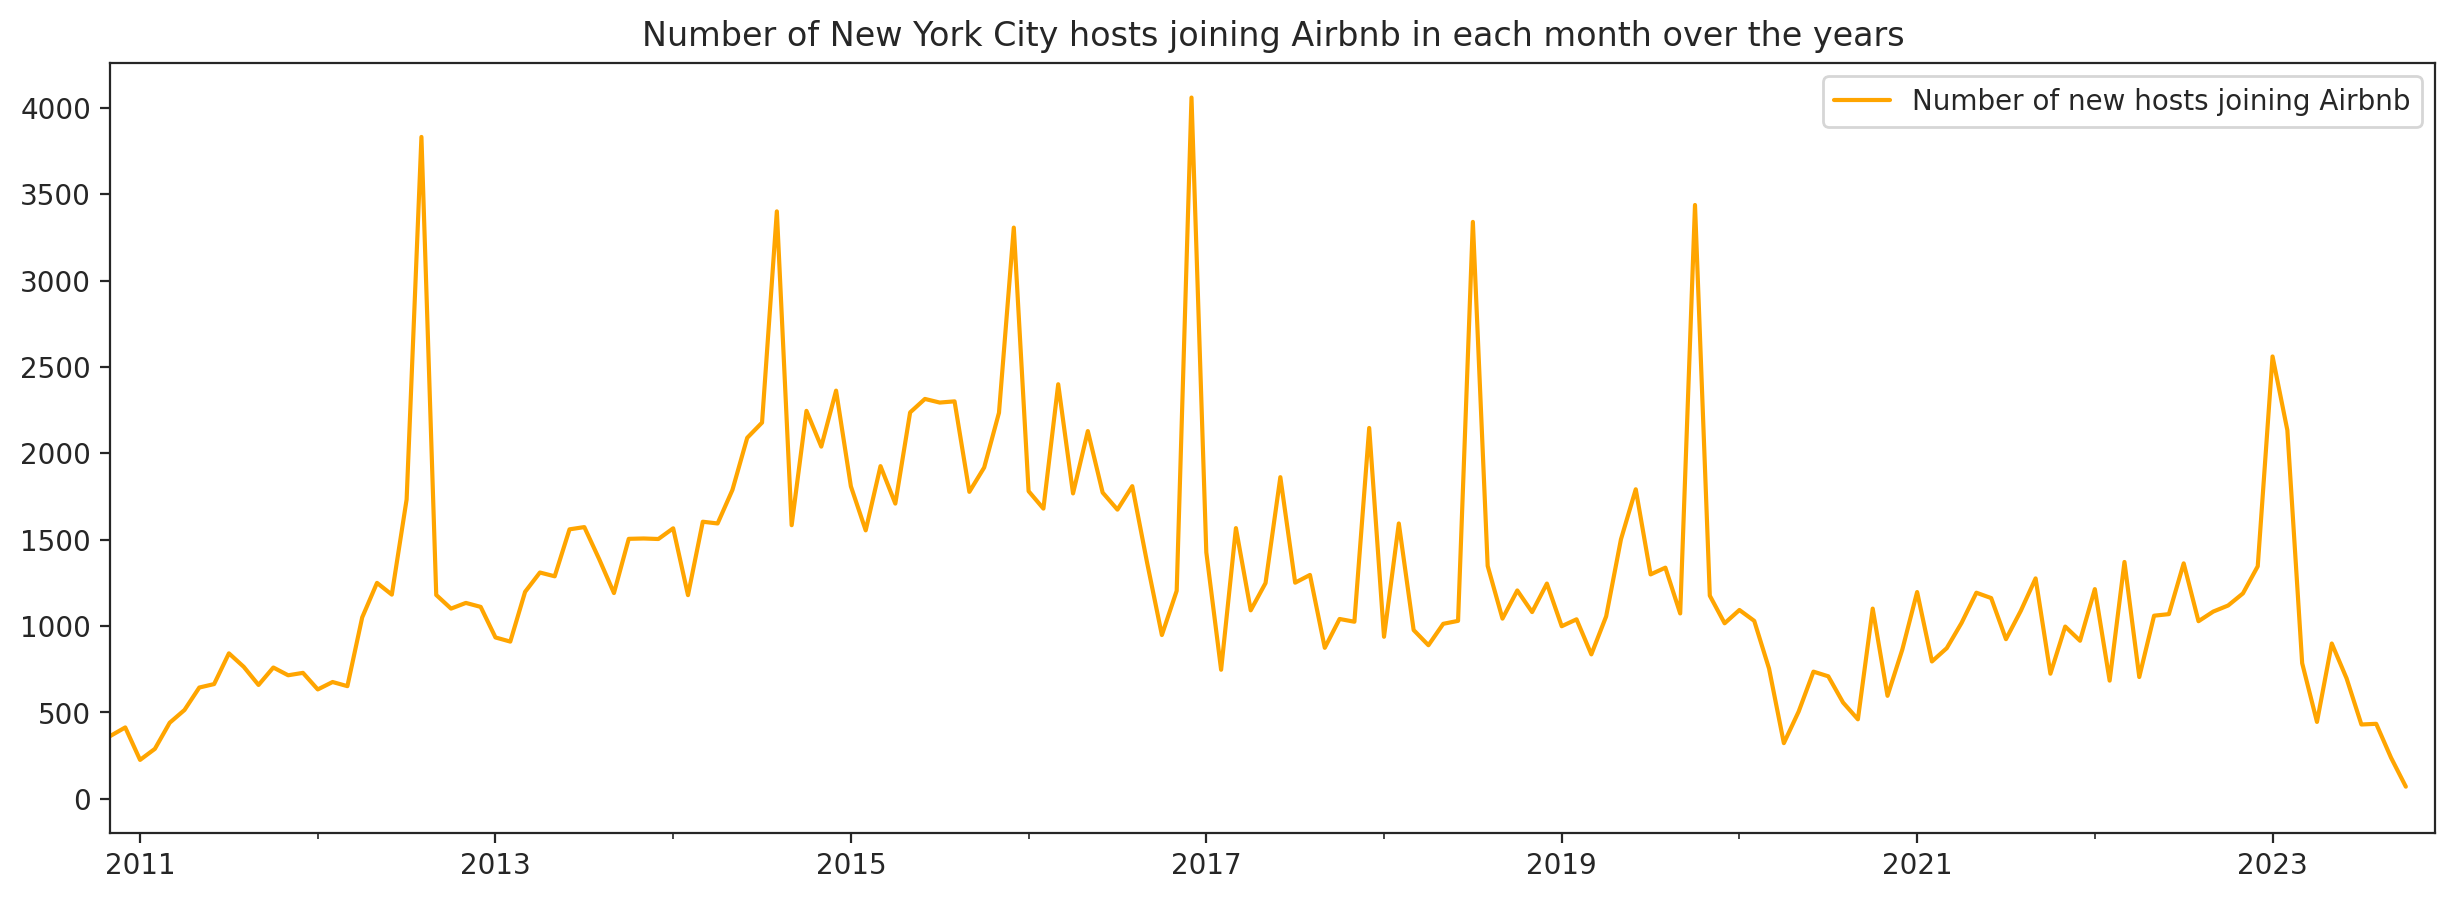

In [45]:
plt.figure(figsize=(15,5))
listings.set_index('host_since').resample('MS').size().plot(label='Number of new hosts joining Airbnb', color='orange')
plt.title('Number of New York City hosts joining Airbnb in each month over the years')
plt.legend()
plt.xlim('2010-11-01', '2023-12-4')
plt.xlabel('')
plt.ylabel('')
plt.show()

<Axes: >

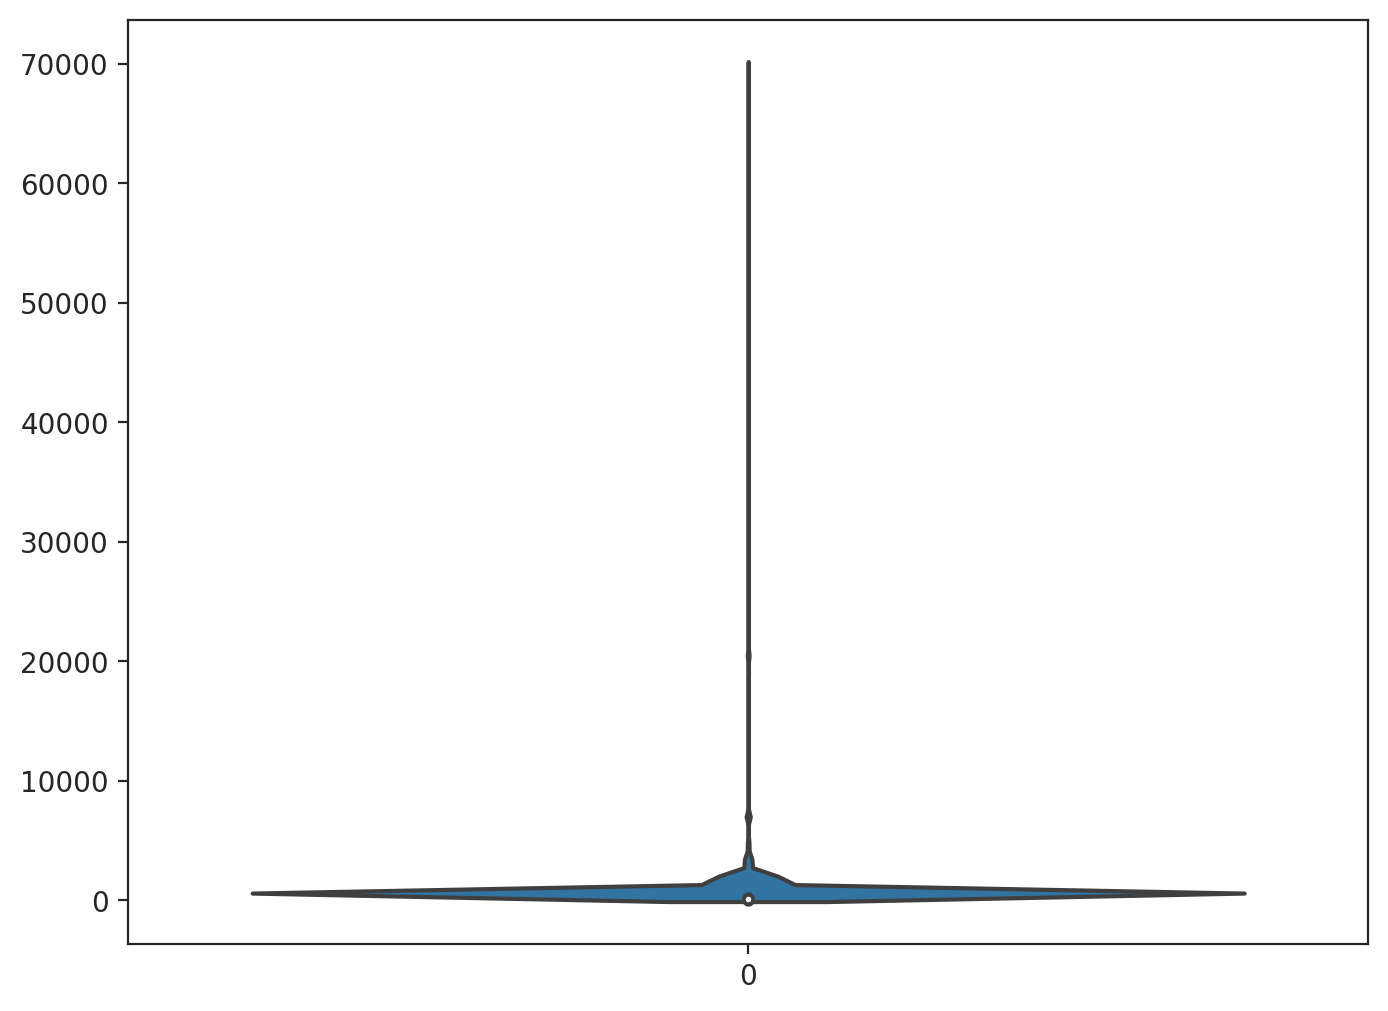

In [46]:
plt.figure(figsize=(8,6))
sns.violinplot(listings.price)

In [47]:
listings.price.describe()

count    204716.000000
mean        214.080355
std         520.964685
min           0.000000
25%          80.000000
50%         135.000000
75%         225.000000
max       70100.000000
Name: price, dtype: float64

In [48]:
q1_price = np.quantile(listings['price'],0.25, interpolation='midpoint')
q3_price = np.quantile(listings['price'],0.75, interpolation='midpoint')
outlier_price = q3_price + 1.5*(q3_price - q1_price)

listings = listings[listings['price'] < outlier_price]
listings.reset_index(drop=True, inplace=True)

In [49]:
# Create list with only numerical columns
col_numerical = [col for col in listings.columns if listings[col].dtype != np.object]
col_numerical = [i for i in col_numerical if i not in ('id', 'host_id', 'host_since', 'latitude','longitude','first_review', 'last_review')]

# Create list with only categorical columns
col_categorical = [col for col in listings.columns if listings[col].dtype == np.object]
col_categorical = [i for i in col_categorical if i not in ('summary', 'description', 'transit', 'neighbourhood_cleansed','property_type')]

In [50]:
nan_counts = listings[col_numerical].isna().sum()
print("NaN Counts in Each Column:\n", nan_counts)

NaN Counts in Each Column:
 accommodates                           0
bathrooms                              0
bedrooms                               8
beds                                   8
price                                  0
minimum_nights                         0
maximum_nights                         0
availability_30                        0
availability_60                        0
availability_90                        0
availability_365                       0
number_of_reviews                      0
number_of_reviews_ltm                  0
number_of_reviews_l30d                 0
calculated_host_listings_count         0
reviews_per_month                      0
host_days_active                       0
check_in_24h                      189210
air_conditioning                   65062
bbq                               175505
balcony                           179586
nature_and_views                  186027
bed_linen                          96725
breakfast                    

In [51]:
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].median())
listings['beds'] = listings['beds'].fillna(listings['beds'].median())
listings['host_days_active'] = listings['host_days_active'].fillna(listings['host_days_active'].median())


In [52]:
for col in ['check_in_24h', 'air_conditioning', 'bbq', 'balcony', 'nature_and_views', 'bed_linen']:
    if not listings[col].mode().empty:
        listings[col] = listings[col].fillna(listings[col].mode()[0])
    else:

        listings[col] = listings[col].fillna(0)


In [53]:
# histogram subplots
def subplot_histograms(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(15, nrows*3.5))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column],bins=15)
        ax[i].set_title(f'{column} distribution',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('frequency', fontsize=14)
        ax[i].axvline(dataframe[column].mean(), linestyle = '--', color = 'r', label ='mean')
        ax[i].axvline(dataframe[column].median(), linestyle = '--', color = 'b', label ='median')
        ax[i].legend()
    plt.tight_layout()

# scatterplot subplots
def subplot_scatter(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/4))
    fig, ax = plt.subplots(nrows=nrows, ncols=4,figsize=(12, nrows*3.5))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.regplot(y=dataframe.price, x=dataframe[column],ax=ax[i], \
                    line_kws = {'color':'grey'})
        ax[i].set_title(f'{column} vs price',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=14)
        ax[i].set_ylabel('price', fontsize=14)
    plt.tight_layout()

# violin subplots
def subplot_violin(dataframe, list_of_columns):
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15, nrows*4))
    ax = ax.ravel()
    for i, column in enumerate(list_of_columns):
        sns.violinplot(x = dataframe[column], y = dataframe.price, width = 0.3, ax = ax[i],orient='v')
        ax[i].set_title(f'Distribution of listing price by {column}',fontsize=14)
        ax[i].tick_params(labelsize=12)
        ax[i].set_xlabel(column, fontsize=12)
        ax[i].set_ylabel('price', fontsize=12)
    plt.tight_layout()

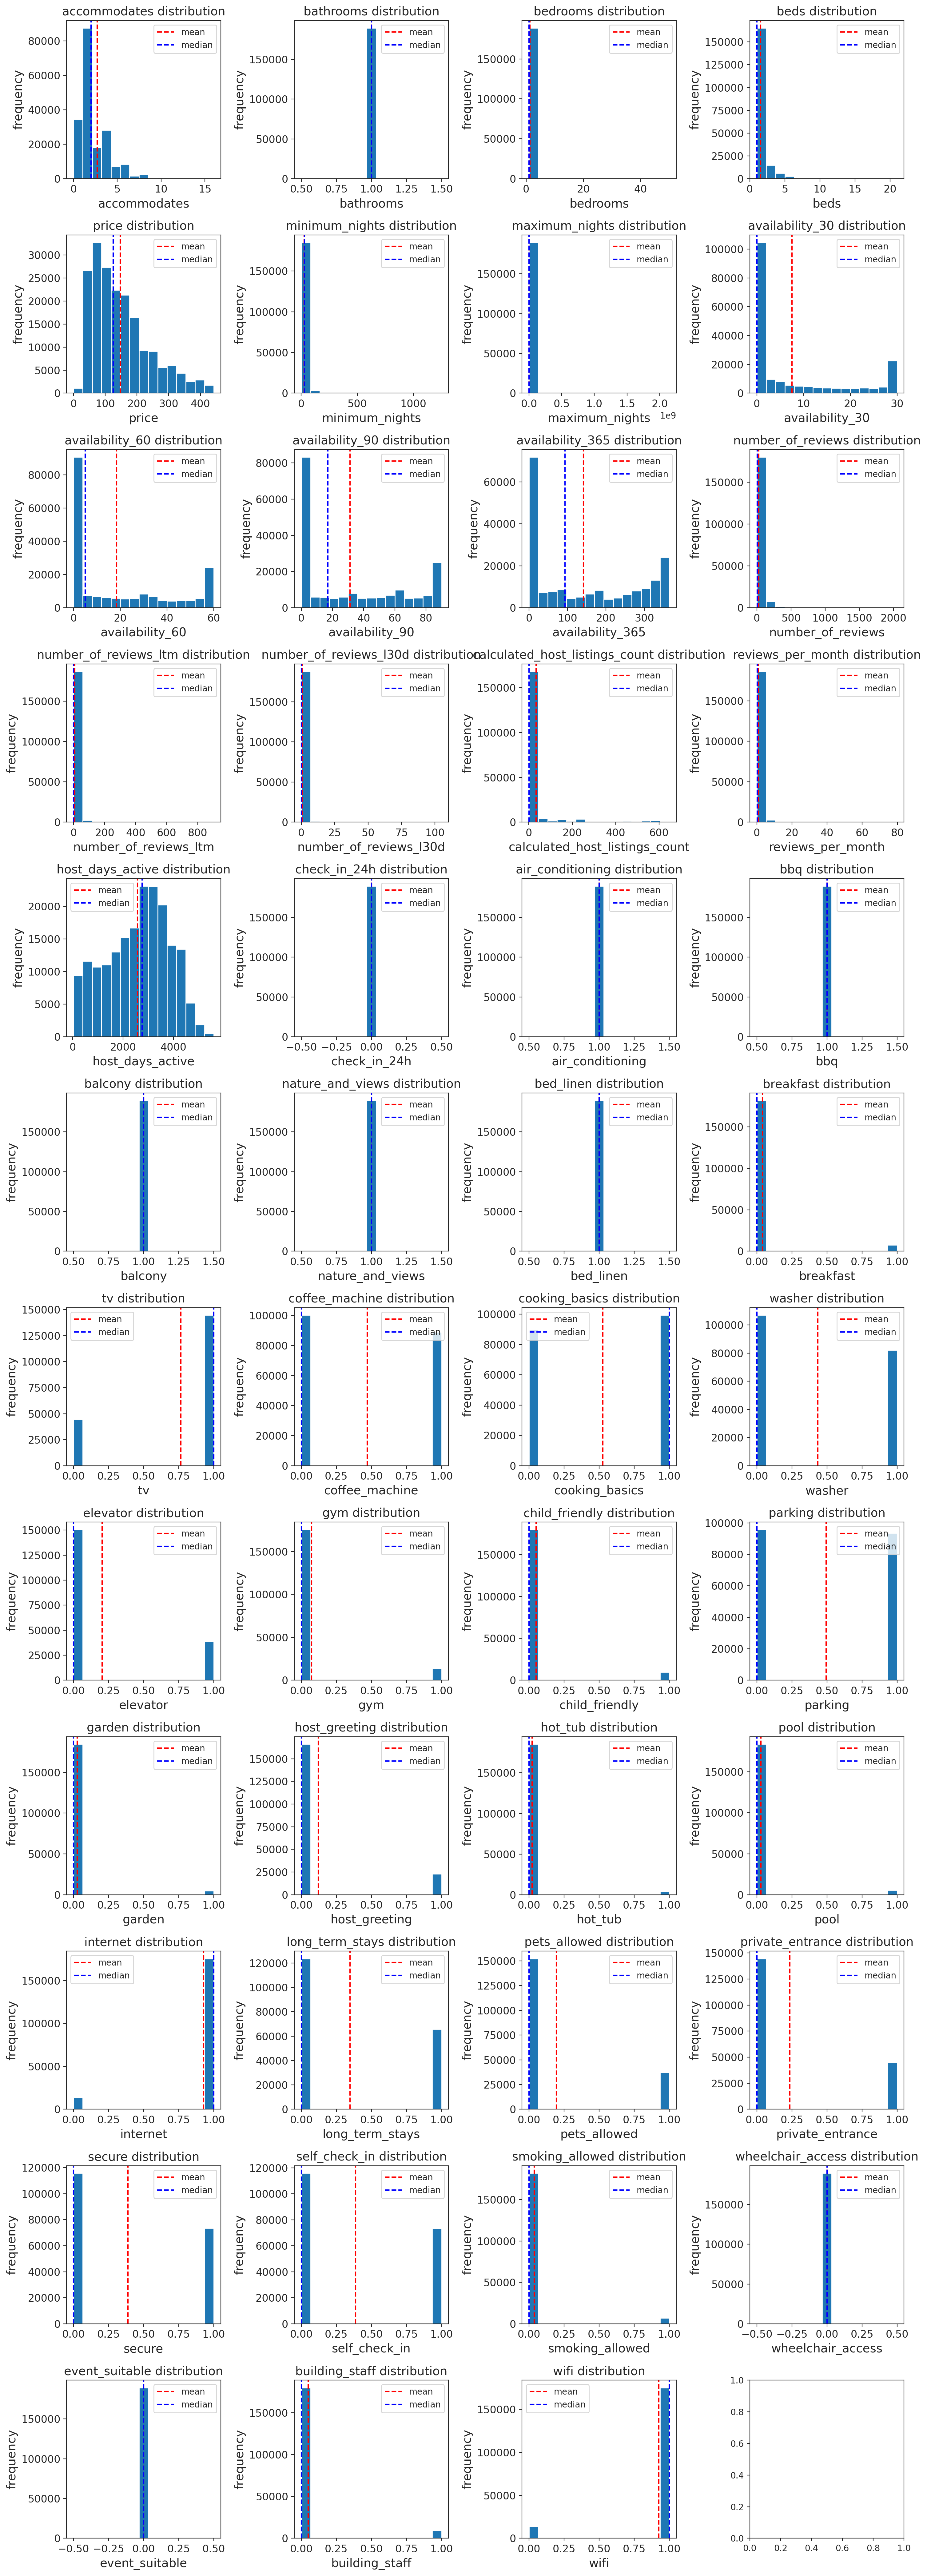

In [54]:
subplot_histograms(listings,col_numerical)

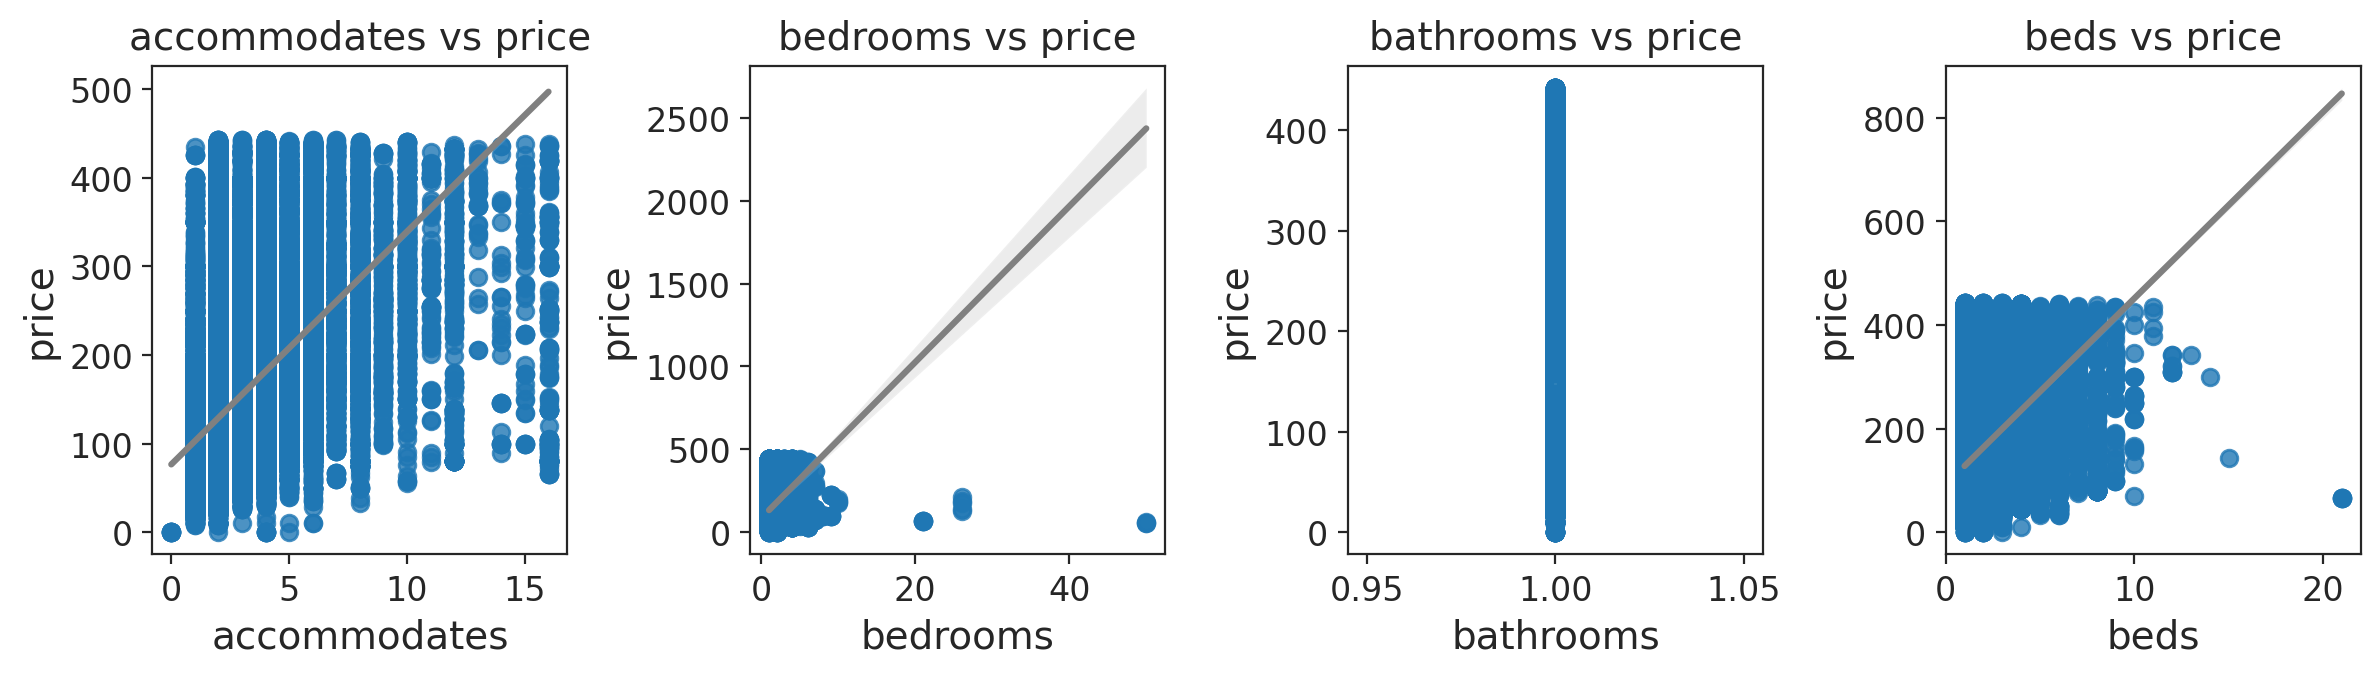

In [56]:
subplot_scatter(listings, ['accommodates', 'bedrooms', 'bathrooms', 'beds'])

In [57]:
listings[['beds','bathrooms','property_category']].groupby(by='property_category').max()

beds  bathrooms
property_category                 
apartment          21.0        1.0
condo               7.0        1.0
hostel             15.0        1.0
svc_apt_hotel      14.0        1.0

In [58]:
listings.columns

Index(['id', 'source', 'description', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month',
       'host_days_active', 'days_since_first_review', 'days_since_l

In [59]:
listings['neighbourhood_cleansed'].nunique()

222

In [60]:
import json

all_features = []

for i in range(2, 8):
    filename = f'/content/drive/MyDrive/RegressionProject/neighbourhoods ({i}).geojson'
    with open(filename, 'r') as f:
        data = json.load(f)
        all_features.extend(data['features'])

map_data = {'type': 'FeatureCollection', 'features': all_features}

In [61]:
neighbourhoods_data = map_data['features']

In [62]:
neighbourhoods_map_df = pd.DataFrame()

In [63]:
for data in neighbourhoods_data:
    neighbourhood_name = data['properties']['neighbourhood']
    coordinates = data['geometry']['coordinates']
    neighbourhoods_map_df = neighbourhoods_map_df.append({'neighbourhood_cleansed': neighbourhood_name}, ignore_index=True)
neighbourhoods_map_df.head()

neighbourhood_cleansed
0              Bayswater
1               Allerton
2            City Island
3       Ditmars Steinway
4             Ozone Park

In [64]:
neighbourhood_df = pd.DataFrame(listings.groupby('neighbourhood_cleansed').size())
neighbourhood_df.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df['median_price'] = listings.groupby('neighbourhood_cleansed').price.median().values
neighbourhood_df.head()

number_of_listings  median_price
neighbourhood_cleansed                                  
Allerton                               234         100.0
Arden Heights                           30         131.5
Arrochar                                70         100.0
Arverne                                466         130.0
Astoria                               3321          90.0

In [65]:
neighbourhood_df_merged = neighbourhoods_map_df.set_index('neighbourhood_cleansed').join(neighbourhood_df)
neighbourhood_df_merged = neighbourhood_df_merged.reset_index()
neighbourhood_df_merged = neighbourhood_df_merged.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})
neighbourhood_df_merged.fillna(0, inplace=True)
neighbourhood_df_merged.sort_values(by='median_price',ascending=False).head()

neighbourhood  number_of_listings  median_price
1232     Todt Hill                17.0         313.0
1230     Todt Hill                17.0         313.0
1235     Todt Hill                17.0         313.0
1234     Todt Hill                17.0         313.0
1233     Todt Hill                17.0         313.0

In [66]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [67]:
!pip install plotly

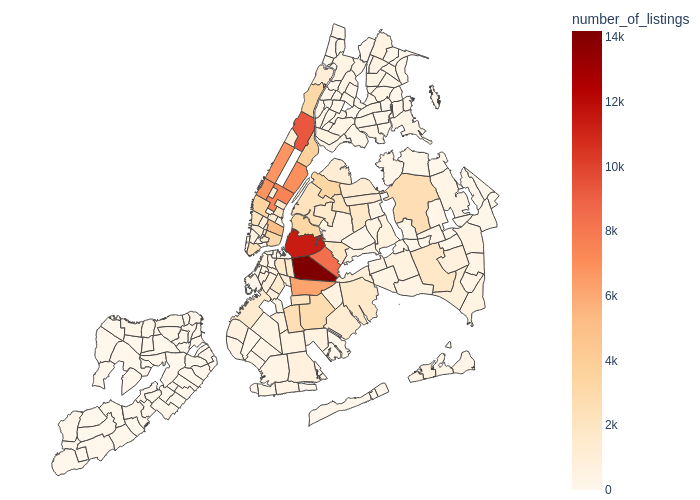

In [68]:
import plotly.express as px

fig = px.choropleth(neighbourhood_df_merged, geojson=map_data, color="number_of_listings",color_continuous_scale='OrRd',
                    locations="neighbourhood", featureidkey="properties.neighbourhood",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show("png")

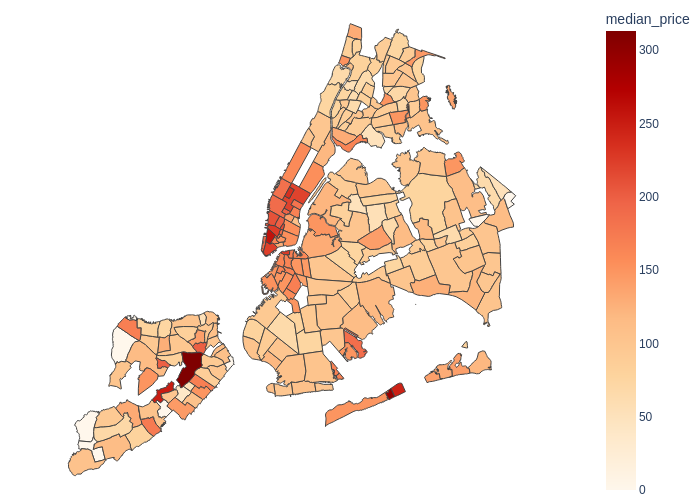

In [69]:
fig = px.choropleth(neighbourhood_df_merged, geojson=map_data, color="median_price",color_continuous_scale='OrRd',
                    locations="neighbourhood", featureidkey="properties.neighbourhood",
                    projection="mercator"
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show("png")

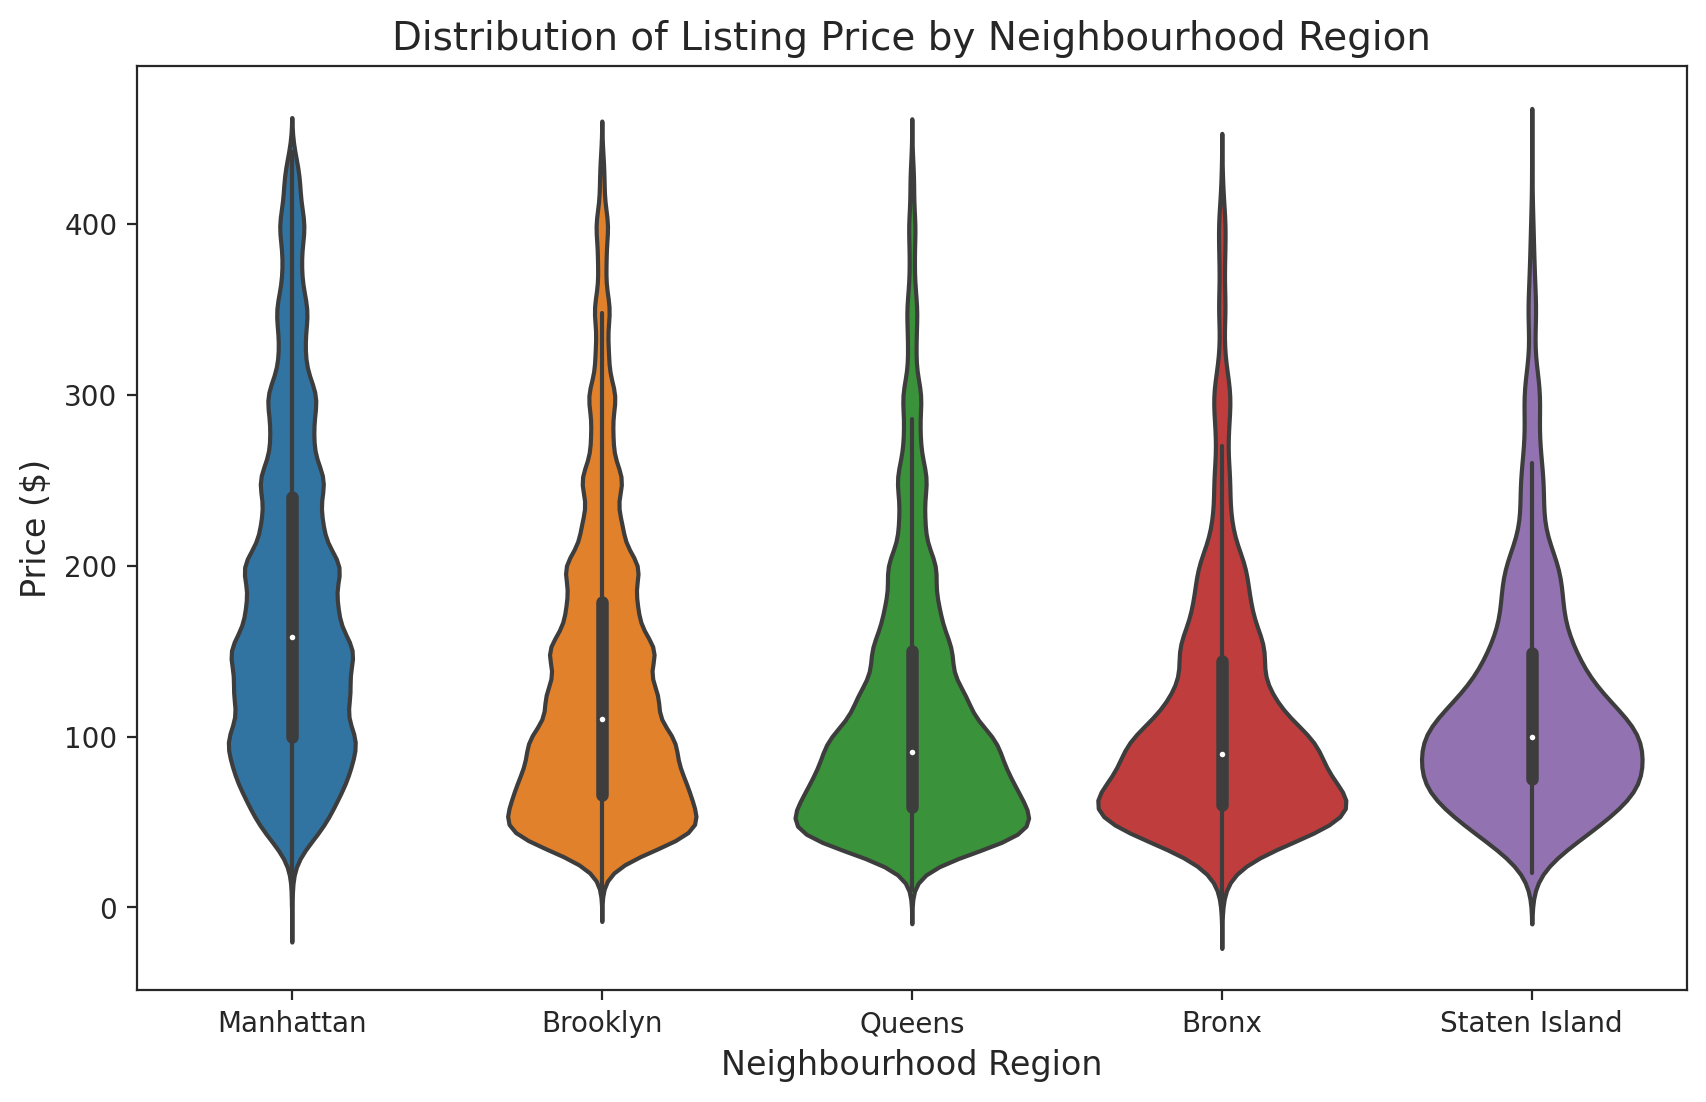

In [70]:
plt.figure(figsize=(10,6))
sns.violinplot(x = "neighbourhood_group_cleansed", y = "price", data = listings)

plt.title('Distribution of Listing Price by Neighbourhood Region', fontsize=14)
plt.xlabel('Neighbourhood Region', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()

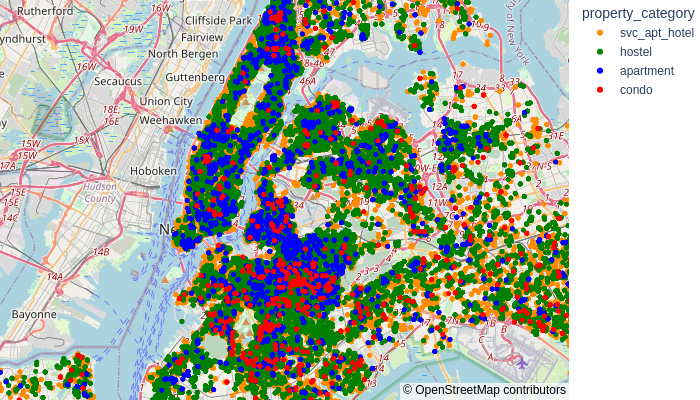

In [71]:
fig = px.scatter_mapbox(listings, lat="latitude", lon="longitude", hover_name="host_id",
                        hover_data=["property_category", "room_type"], zoom=10, height=400,color="property_category",
                        color_discrete_sequence=px.colors.qualitative.G10,
                        color_discrete_map={
                            "apartment": "blue","condo": "red","svc_apt_hotel": "darkorange", "hostel": "green",},
                        size_max=15)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show("png")

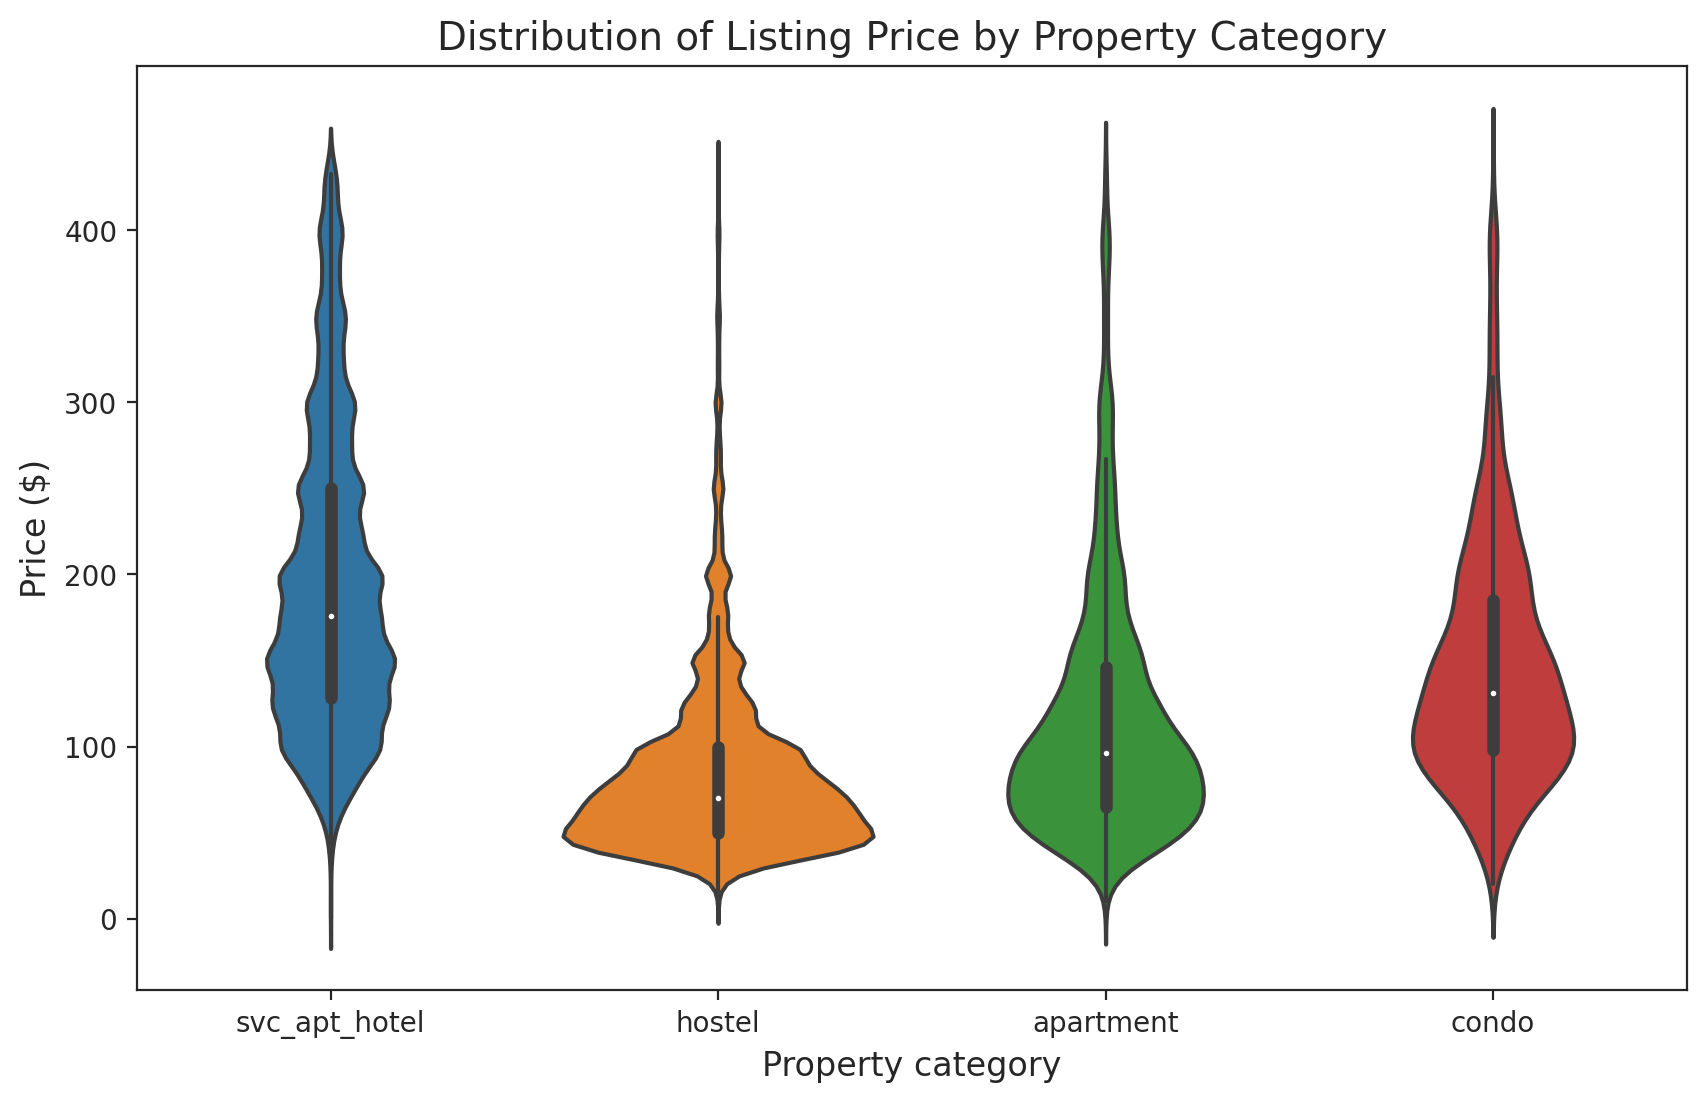

In [72]:
plt.figure(figsize=(10,6))
sns.violinplot(x = "property_category", y = "price", data = listings)

plt.title('Distribution of Listing Price by Property Category', fontsize=14)
plt.xlabel('Property category', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()



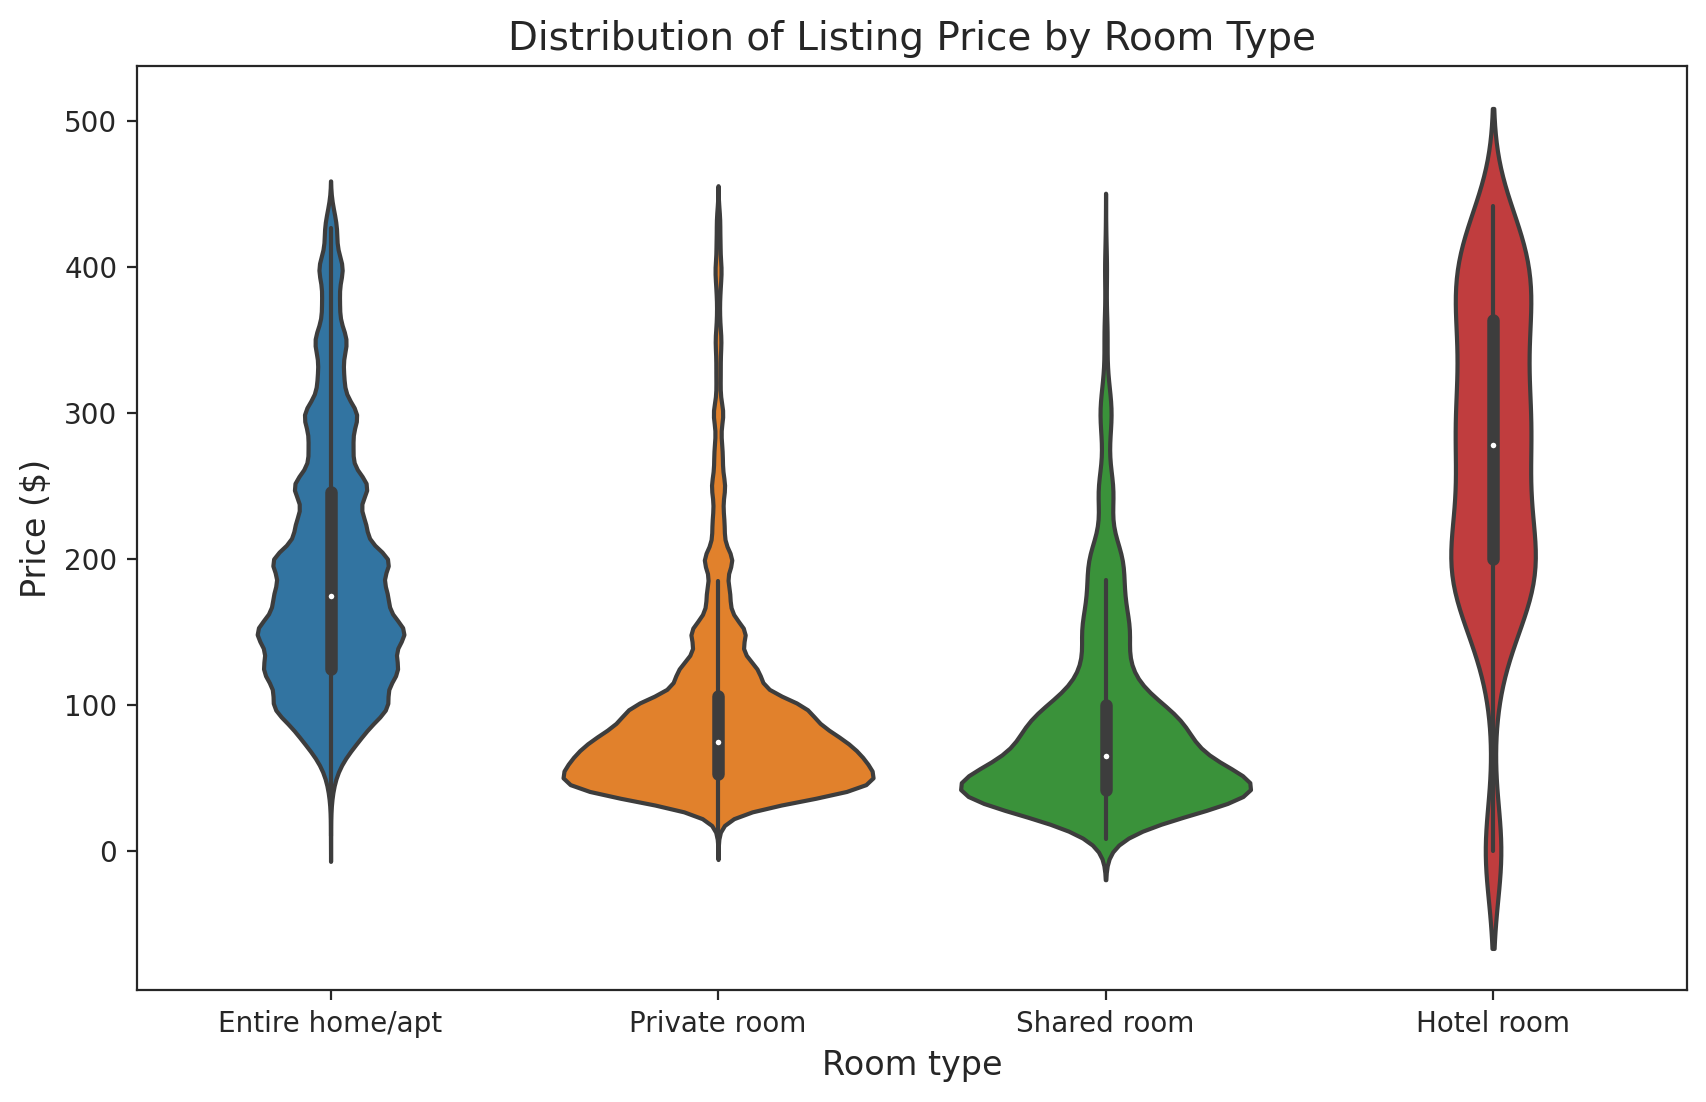

In [73]:
plt.figure(figsize=(10,6))
sns.violinplot(x = "room_type", y = "price", data = listings)

plt.title('Distribution of Listing Price by Room Type', fontsize=14)
plt.xlabel('Room type', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()

In [74]:
listings.groupby(by='property_category').price.median()

property_category
apartment         96.0
condo            131.0
hostel            70.0
svc_apt_hotel    176.0
Name: price, dtype: float64

In [75]:
listings.groupby(by='room_type').price.median()

room_type
Entire home/apt    175.0
Hotel room         278.0
Private room        75.0
Shared room         65.0
Name: price, dtype: float64

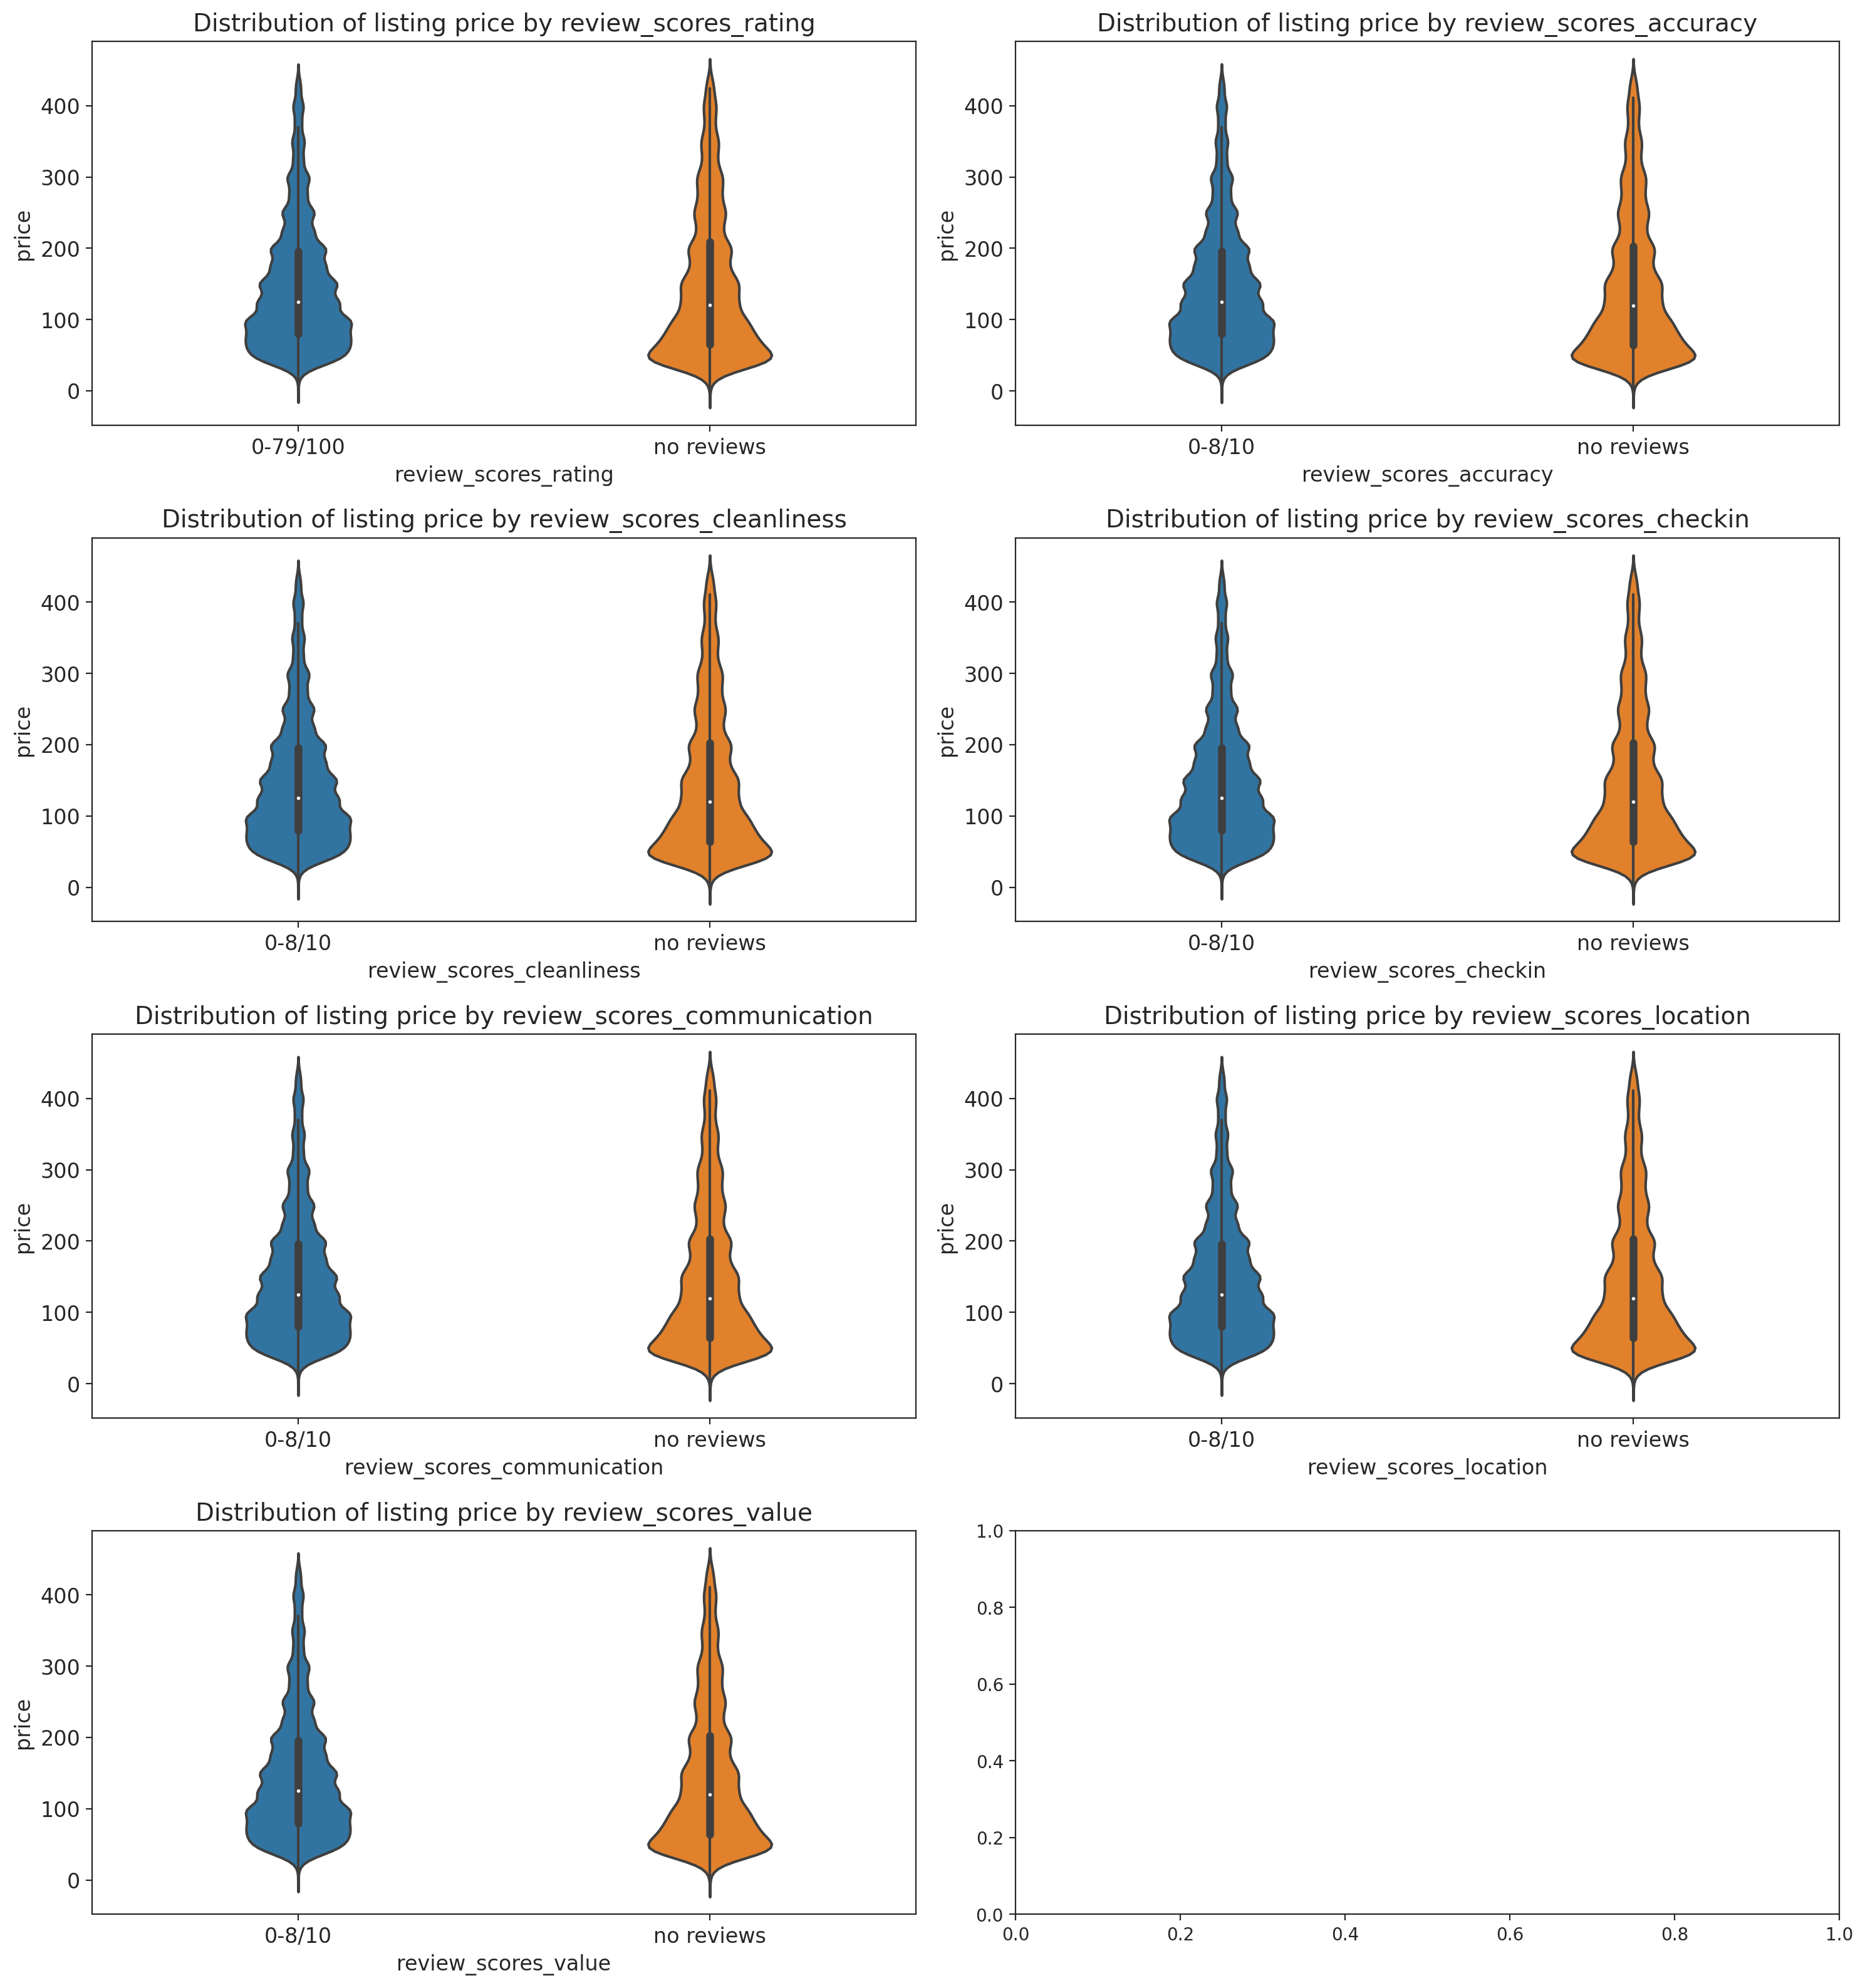

In [76]:
subplot_violin(listings, ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                          'review_scores_checkin','review_scores_communication','review_scores_location',
                          'review_scores_value'])

In [77]:
listings.groupby(by='review_scores_rating').price.median()

review_scores_rating
0-79/100      125.0
no reviews    120.0
Name: price, dtype: float64

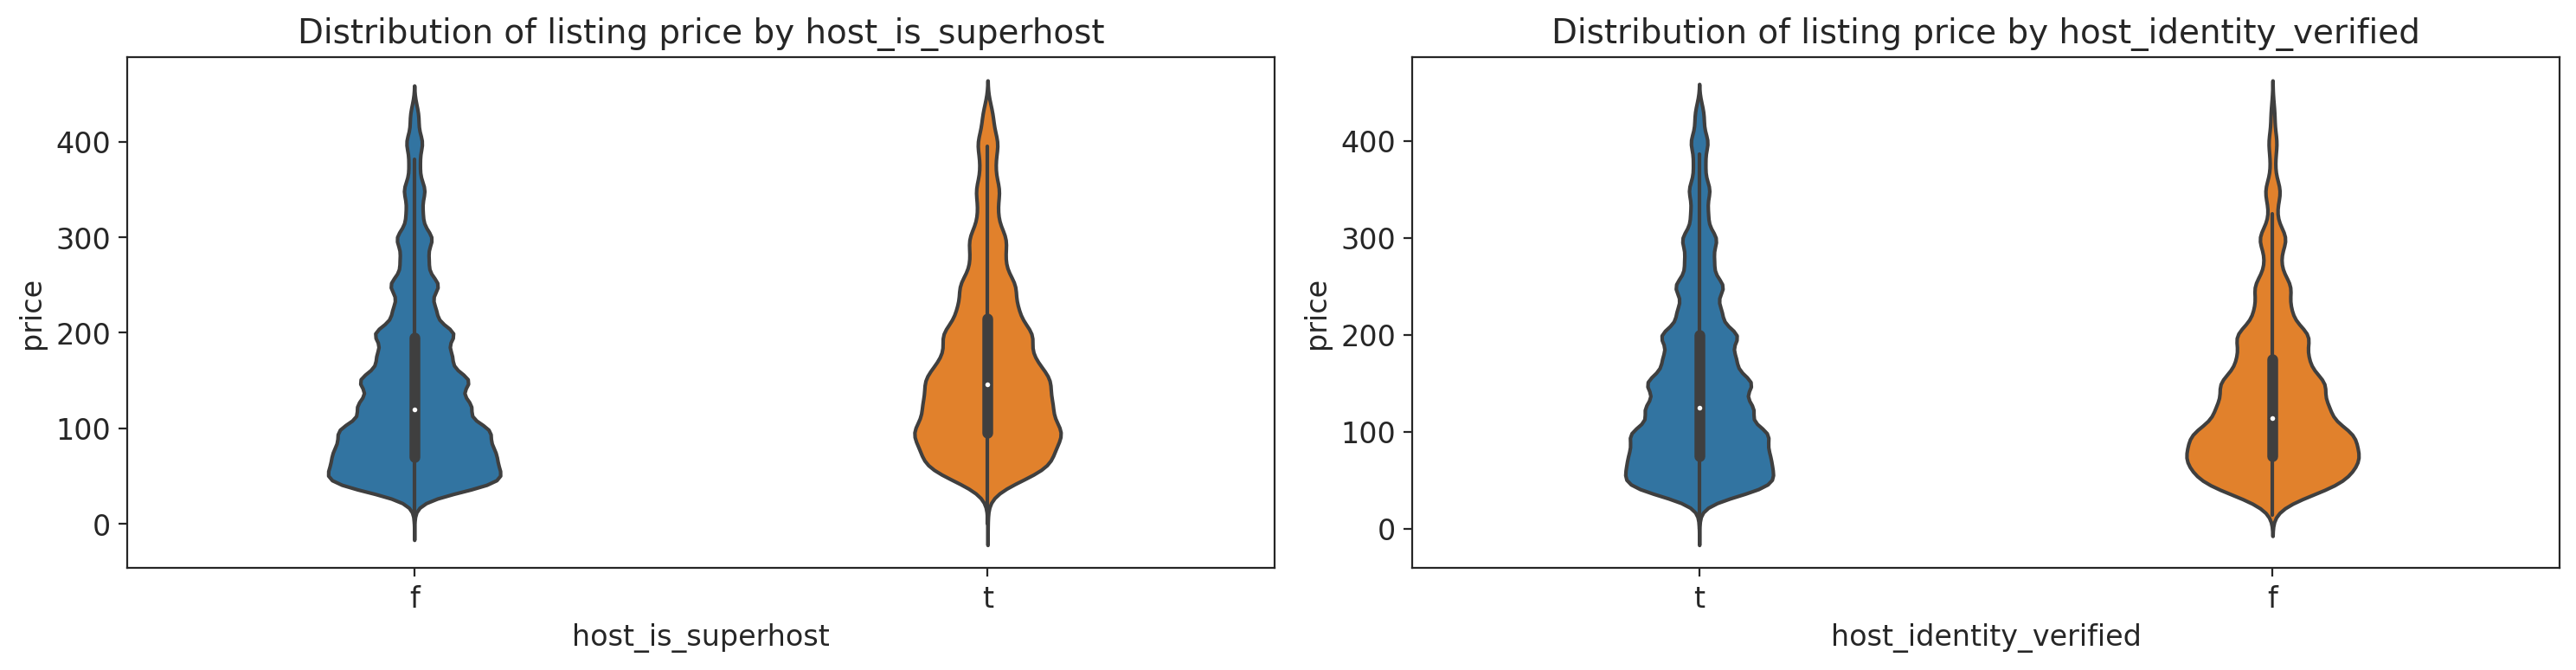

In [78]:
subplot_violin(listings, ['host_is_superhost','host_identity_verified'])

In [79]:
listings.groupby(by='host_is_superhost').price.median()

host_is_superhost
f    120.0
t    146.0
Name: price, dtype: float64

In [80]:
listings['host_is_superhost'].value_counts()

f    152334
t     36876
Name: host_is_superhost, dtype: int64

In [81]:
subplot_violin(listings, ['check_in_24h', 'air_conditioning', 'bbq', 'balcony',
       'nature_and_views', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'washer', 'elevator', 'gym', 'child_friendly',
       'parking', 'garden', 'host_greeting', 'hot_tub', 'pool', 'internet',
       'long_term_stays', 'pets_allowed', 'private_entrance', 'secure',
       'self_check_in', 'smoking_allowed', 'wheelchair_access',
       'event_suitable', 'wifi', 'building_staff'])

Output hidden; open in https://colab.research.google.com to view.

In [82]:
listings[['description']] = listings[['description']].astype(str)
listings['description_text_length'] = [len(x) for x in listings['description'].str.split(' ')]
listings.description_text_length.replace(1, 0, inplace=True)

In [83]:
listings.head(2)

id       source                                        description  \
0   9357  city scrape  Cozy & comfy studio on a quiet, tree-lined str...   
1  10452  city scrape  Great location.<br /><br /><b>The space</b><br...   

   host_id host_since  host_response_time host_response_rate  \
0    30193 2009-08-06  within a few hours            95-100%   
1    35935 2009-09-03  within a few hours             80-94%   

  host_acceptance_rate host_is_superhost host_identity_verified  \
0              unknown                 f                      t   
1               50-69%                 t                      t   

  neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude  \
0         Hell's Kitchen                    Manhattan  40.76724  -73.98664   
1     Bedford-Stuyvesant                     Brooklyn  40.68294  -73.95682   

                 property_type        room_type  accommodates  bathrooms  \
0           Entire rental unit  Entire home/apt             2        1.0   
1  Private room in rental unit     Private room             2        1.0   

  bathrooms_text  bedrooms  beds  price  minimum_nights  maximum_nights  \
0         1 bath       1.0   1.0  175.0              45             365   
1  1 shared bath       1.0   2.0   90.0              30             730   

   availability_30  availability_60  availability_90  availability_365  \
0               16               46               76               340   
1               12               12               15               290   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                 58                      0                       0   
1                 80                      2                       0   

  first_review last_review review_scores_rating review_scores_accuracy  \
0   2009-10-04  2017-08-13             0-79/100                 0-8/10   
1   2010-04-18  2023-09-16             0-79/100                 0-8/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                    0-8/10                0-8/10                      0-8/10   
1                    0-8/10                0-8/10                      0-8/10   

  review_scores_location review_scores_value instant_bookable  \
0                 0-8/10              0-8/10                f   
1                 0-8/10              0-8/10                f   

   calculated_host_listings_count  reviews_per_month  host_days_active  \
0                               1               0.34            5234.0   
1                               4               0.49            5206.0   

  days_since_first_review days_since_last_review  check_in_24h  \
0                >4 years               >2 years           0.0   
1                >4 years             0-3 months           0.0   

   air_conditioning  bbq  balcony  nature_and_views  bed_linen  breakfast  \
0               1.0  1.0      1.0               1.0        1.0        0.0   
1               1.0  1.0      1.0               1.0        1.0        0.0   

    tv  coffee_machine  cooking_basics  washer  elevator  gym  child_friendly  \
0  0.0             1.0             1.0     0.0       1.0  0.0             0.0   
1  1.0             1.0             1.0     0.0       0.0  0.0             0.0   

   parking  garden  host_greeting  hot_tub  pool  internet  long_term_stays  \
0      1.0     0.0            1.0      0.0   0.0       1.0              1.0   
1      1.0     0.0            0.0      0.0   0.0       1.0              1.0   

   pets_allowed  private_entrance  secure  self_check_in  smoking_allowed  \
0           1.0               0.0     0.0            0.0              0.0   
1           0.0               0.0     1.0            0.0              0.0   

   wheelchair_access  event_suitable  building_staff  wifi property_category  \
0                0.0             0.0             0.0   1.0     svc_apt_hotel   
1                0.0             0.0             0.0   1.0      

In [84]:
listings.columns

Index(['id', 'source', 'description', 'host_id', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month',
       'host_days_active', 'days_since_first_review', 'days_since_l

In [85]:
listings['lat_long'] = listings[['latitude', 'longitude']].apply(tuple, axis=1)

In [86]:
from geopy.distance import geodesic

nyc_location = (40.7639, -73.9794)
listings['distance_to_nyc'] = listings['lat_long'].apply(lambda coords: geodesic(nyc_location, coords).km)

In [87]:
listings.head(2)

id       source                                        description  \
0   9357  city scrape  Cozy & comfy studio on a quiet, tree-lined str...   
1  10452  city scrape  Great location.<br /><br /><b>The space</b><br...   

   host_id host_since  host_response_time host_response_rate  \
0    30193 2009-08-06  within a few hours            95-100%   
1    35935 2009-09-03  within a few hours             80-94%   

  host_acceptance_rate host_is_superhost host_identity_verified  \
0              unknown                 f                      t   
1               50-69%                 t                      t   

  neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude  \
0         Hell's Kitchen                    Manhattan  40.76724  -73.98664   
1     Bedford-Stuyvesant                     Brooklyn  40.68294  -73.95682   

                 property_type        room_type  accommodates  bathrooms  \
0           Entire rental unit  Entire home/apt             2        1.0   
1  Private room in rental unit     Private room             2        1.0   

  bathrooms_text  bedrooms  beds  price  minimum_nights  maximum_nights  \
0         1 bath       1.0   1.0  175.0              45             365   
1  1 shared bath       1.0   2.0   90.0              30             730   

   availability_30  availability_60  availability_90  availability_365  \
0               16               46               76               340   
1               12               12               15               290   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                 58                      0                       0   
1                 80                      2                       0   

  first_review last_review review_scores_rating review_scores_accuracy  \
0   2009-10-04  2017-08-13             0-79/100                 0-8/10   
1   2010-04-18  2023-09-16             0-79/100                 0-8/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                    0-8/10                0-8/10                      0-8/10   
1                    0-8/10                0-8/10                      0-8/10   

  review_scores_location review_scores_value instant_bookable  \
0                 0-8/10              0-8/10                f   
1                 0-8/10              0-8/10                f   

   calculated_host_listings_count  reviews_per_month  host_days_active  \
0                               1               0.34            5234.0   
1                               4               0.49            5206.0   

  days_since_first_review days_since_last_review  check_in_24h  \
0                >4 years               >2 years           0.0   
1                >4 years             0-3 months           0.0   

   air_conditioning  bbq  balcony  nature_and_views  bed_linen  breakfast  \
0               1.0  1.0      1.0               1.0        1.0        0.0   
1               1.0  1.0      1.0               1.0        1.0        0.0   

    tv  coffee_machine  cooking_basics  washer  elevator  gym  child_friendly  \
0  0.0             1.0             1.0     0.0       1.0  0.0             0.0   
1  1.0             1.0             1.0     0.0       0.0  0.0             0.0   

   parking  garden  host_greeting  hot_tub  pool  internet  long_term_stays  \
0      1.0     0.0            1.0      0.0   0.0       1.0              1.0   
1      1.0     0.0            0.0      0.0   0.0       1.0              1.0   

   pets_allowed  private_entrance  secure  self_check_in  smoking_allowed  \
0           1.0               0.0     0.0            0.0              0.0   
1           0.0               0.0     1.0            0.0              0.0   

   wheelchair_access  event_suitable  building_staff  wifi property_category  \
0                0.0             0.0             0.0   1.0     svc_apt_hotel   
1                0.0             0.0             0.0   1.0      

In [88]:
sentiment_scores = pd.read_csv('/content/drive/MyDrive/RegressionProject/sentiment_scores.csv')


In [89]:
sentiment_scores.rename(columns={'listing_id': 'id'}, inplace=True)
listings = pd.merge(listings, sentiment_scores, on='id', how='left')
listings.sentiment_compound.fillna(0, inplace=True)
listings.head(1)

id       source                                        description  \
0  9357  city scrape  Cozy & comfy studio on a quiet, tree-lined str...   

   host_id host_since  host_response_time host_response_rate  \
0    30193 2009-08-06  within a few hours            95-100%   

  host_acceptance_rate host_is_superhost host_identity_verified  \
0              unknown                 f                      t   

  neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude  \
0         Hell's Kitchen                    Manhattan  40.76724  -73.98664   

        property_type        room_type  accommodates  bathrooms  \
0  Entire rental unit  Entire home/apt             2        1.0   

  bathrooms_text  bedrooms  beds  price  minimum_nights  maximum_nights  \
0         1 bath       1.0   1.0  175.0              45             365   

   availability_30  availability_60  availability_90  availability_365  \
0               16               46               76               340   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                 58                      0                       0   

  first_review last_review review_scores_rating review_scores_accuracy  \
0   2009-10-04  2017-08-13             0-79/100                 0-8/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                    0-8/10                0-8/10                      0-8/10   

  review_scores_location review_scores_value instant_bookable  \
0                 0-8/10              0-8/10                f   

   calculated_host_listings_count  reviews_per_month  host_days_active  \
0                               1               0.34            5234.0   

  days_since_first_review days_since_last_review  check_in_24h  \
0                >4 years               >2 years           0.0   

   air_conditioning  bbq  balcony  nature_and_views  bed_linen  breakfast  \
0               1.0  1.0      1.0               1.0        1.0        0.0   

    tv  coffee_machine  cooking_basics  washer  elevator  gym  child_friendly  \
0  0.0             1.0             1.0     0.0       1.0  0.0             0.0   

   parking  garden  host_greeting  hot_tub  pool  internet  long_term_stays  \
0      1.0     0.0            1.0      0.0   0.0       1.0              1.0   

   pets_allowed  private_entrance  secure  self_check_in  smoking_allowed  \
0           1.0               0.0     0.0            0.0              0.0   

   wheelchair_access  event_suitable  building_staff  wifi property_category  \
0                0.0             0.0             0.0   1.0     svc_apt_hotel   

   description_text_length               lat_long  distance_to_nyc  \
0                      168  (40.76724, -73.98664)         0.715016   

   sentiment_compound  
0                 0.0

In [90]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189210 entries, 0 to 189209
Data columns (total 81 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              189210 non-null  int64         
 1   source                          189210 non-null  object        
 2   description                     189210 non-null  object        
 3   host_id                         189210 non-null  int64         
 4   host_since                      189185 non-null  datetime64[ns]
 5   host_response_time              189210 non-null  object        
 6   host_response_rate              189210 non-null  object        
 7   host_acceptance_rate            189210 non-null  object        
 8   host_is_superhost               189210 non-null  object        
 9   host_identity_verified          189210 non-null  object        
 10  neighbourhood_cleansed          189210 non-null  object 

In [91]:
boolean_cols=['host_is_superhost','instant_bookable', 'host_identity_verified']

def boolean(x):
    if x=='t':
        return 1
    elif x=='f':
        return 0

for i in boolean_cols:
    listings[i] = listings[i].apply(boolean)

listings.head(2)

id       source                                        description  \
0   9357  city scrape  Cozy & comfy studio on a quiet, tree-lined str...   
1  10452  city scrape  Great location.<br /><br /><b>The space</b><br...   

   host_id host_since  host_response_time host_response_rate  \
0    30193 2009-08-06  within a few hours            95-100%   
1    35935 2009-09-03  within a few hours             80-94%   

  host_acceptance_rate  host_is_superhost  host_identity_verified  \
0              unknown                  0                       1   
1               50-69%                  1                       1   

  neighbourhood_cleansed neighbourhood_group_cleansed  latitude  longitude  \
0         Hell's Kitchen                    Manhattan  40.76724  -73.98664   
1     Bedford-Stuyvesant                     Brooklyn  40.68294  -73.95682   

                 property_type        room_type  accommodates  bathrooms  \
0           Entire rental unit  Entire home/apt             2        1.0   
1  Private room in rental unit     Private room             2        1.0   

  bathrooms_text  bedrooms  beds  price  minimum_nights  maximum_nights  \
0         1 bath       1.0   1.0  175.0              45             365   
1  1 shared bath       1.0   2.0   90.0              30             730   

   availability_30  availability_60  availability_90  availability_365  \
0               16               46               76               340   
1               12               12               15               290   

   number_of_reviews  number_of_reviews_ltm  number_of_reviews_l30d  \
0                 58                      0                       0   
1                 80                      2                       0   

  first_review last_review review_scores_rating review_scores_accuracy  \
0   2009-10-04  2017-08-13             0-79/100                 0-8/10   
1   2010-04-18  2023-09-16             0-79/100                 0-8/10   

  review_scores_cleanliness review_scores_checkin review_scores_communication  \
0                    0-8/10                0-8/10                      0-8/10   
1                    0-8/10                0-8/10                      0-8/10   

  review_scores_location review_scores_value  instant_bookable  \
0                 0-8/10              0-8/10                 0   
1                 0-8/10              0-8/10                 0   

   calculated_host_listings_count  reviews_per_month  host_days_active  \
0                               1               0.34            5234.0   
1                               4               0.49            5206.0   

  days_since_first_review days_since_last_review  check_in_24h  \
0                >4 years               >2 years           0.0   
1                >4 years             0-3 months           0.0   

   air_conditioning  bbq  balcony  nature_and_views  bed_linen  breakfast  \
0               1.0  1.0      1.0               1.0        1.0        0.0   
1               1.0  1.0      1.0               1.0        1.0        0.0   

    tv  coffee_machine  cooking_basics  washer  elevator  gym  child_friendly  \
0  0.0             1.0             1.0     0.0       1.0  0.0             0.0   
1  1.0             1.0             1.0     0.0       0.0  0.0             0.0   

   parking  garden  host_greeting  hot_tub  pool  internet  long_term_stays  \
0      1.0     0.0            1.0      0.0   0.0       1.0              1.0   
1      1.0     0.0            0.0      0.0   0.0       1.0              1.0   

   pets_allowed  private_entrance  secure  self_check_in  smoking_allowed  \
0           1.0               0.0     0.0            0.0              0.0   
1           0.0               0.0     1.0            0.0              0.0   

   wheelchair_access  event_suitable  building_staff  wifi property_category  \
0                0.0             0.0             0.0   1.0     svc_apt_hotel   
1                0.0             0.0             0.0   

In [92]:
listings = listings.drop(['description','host_id','host_since',
                         'latitude','longitude','property_type','first_review','last_review',
                         'lat_long','neighbourhood_cleansed'], axis=1)

In [93]:
col_categorical = [col for col in listings.columns if listings[col].dtype == np.object]
col_categorical

['source',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed',
 'room_type',
 'bathrooms_text',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'days_since_first_review',
 'days_since_last_review',
 'property_category']

In [94]:
listings = pd.get_dummies(listings, columns = col_categorical)


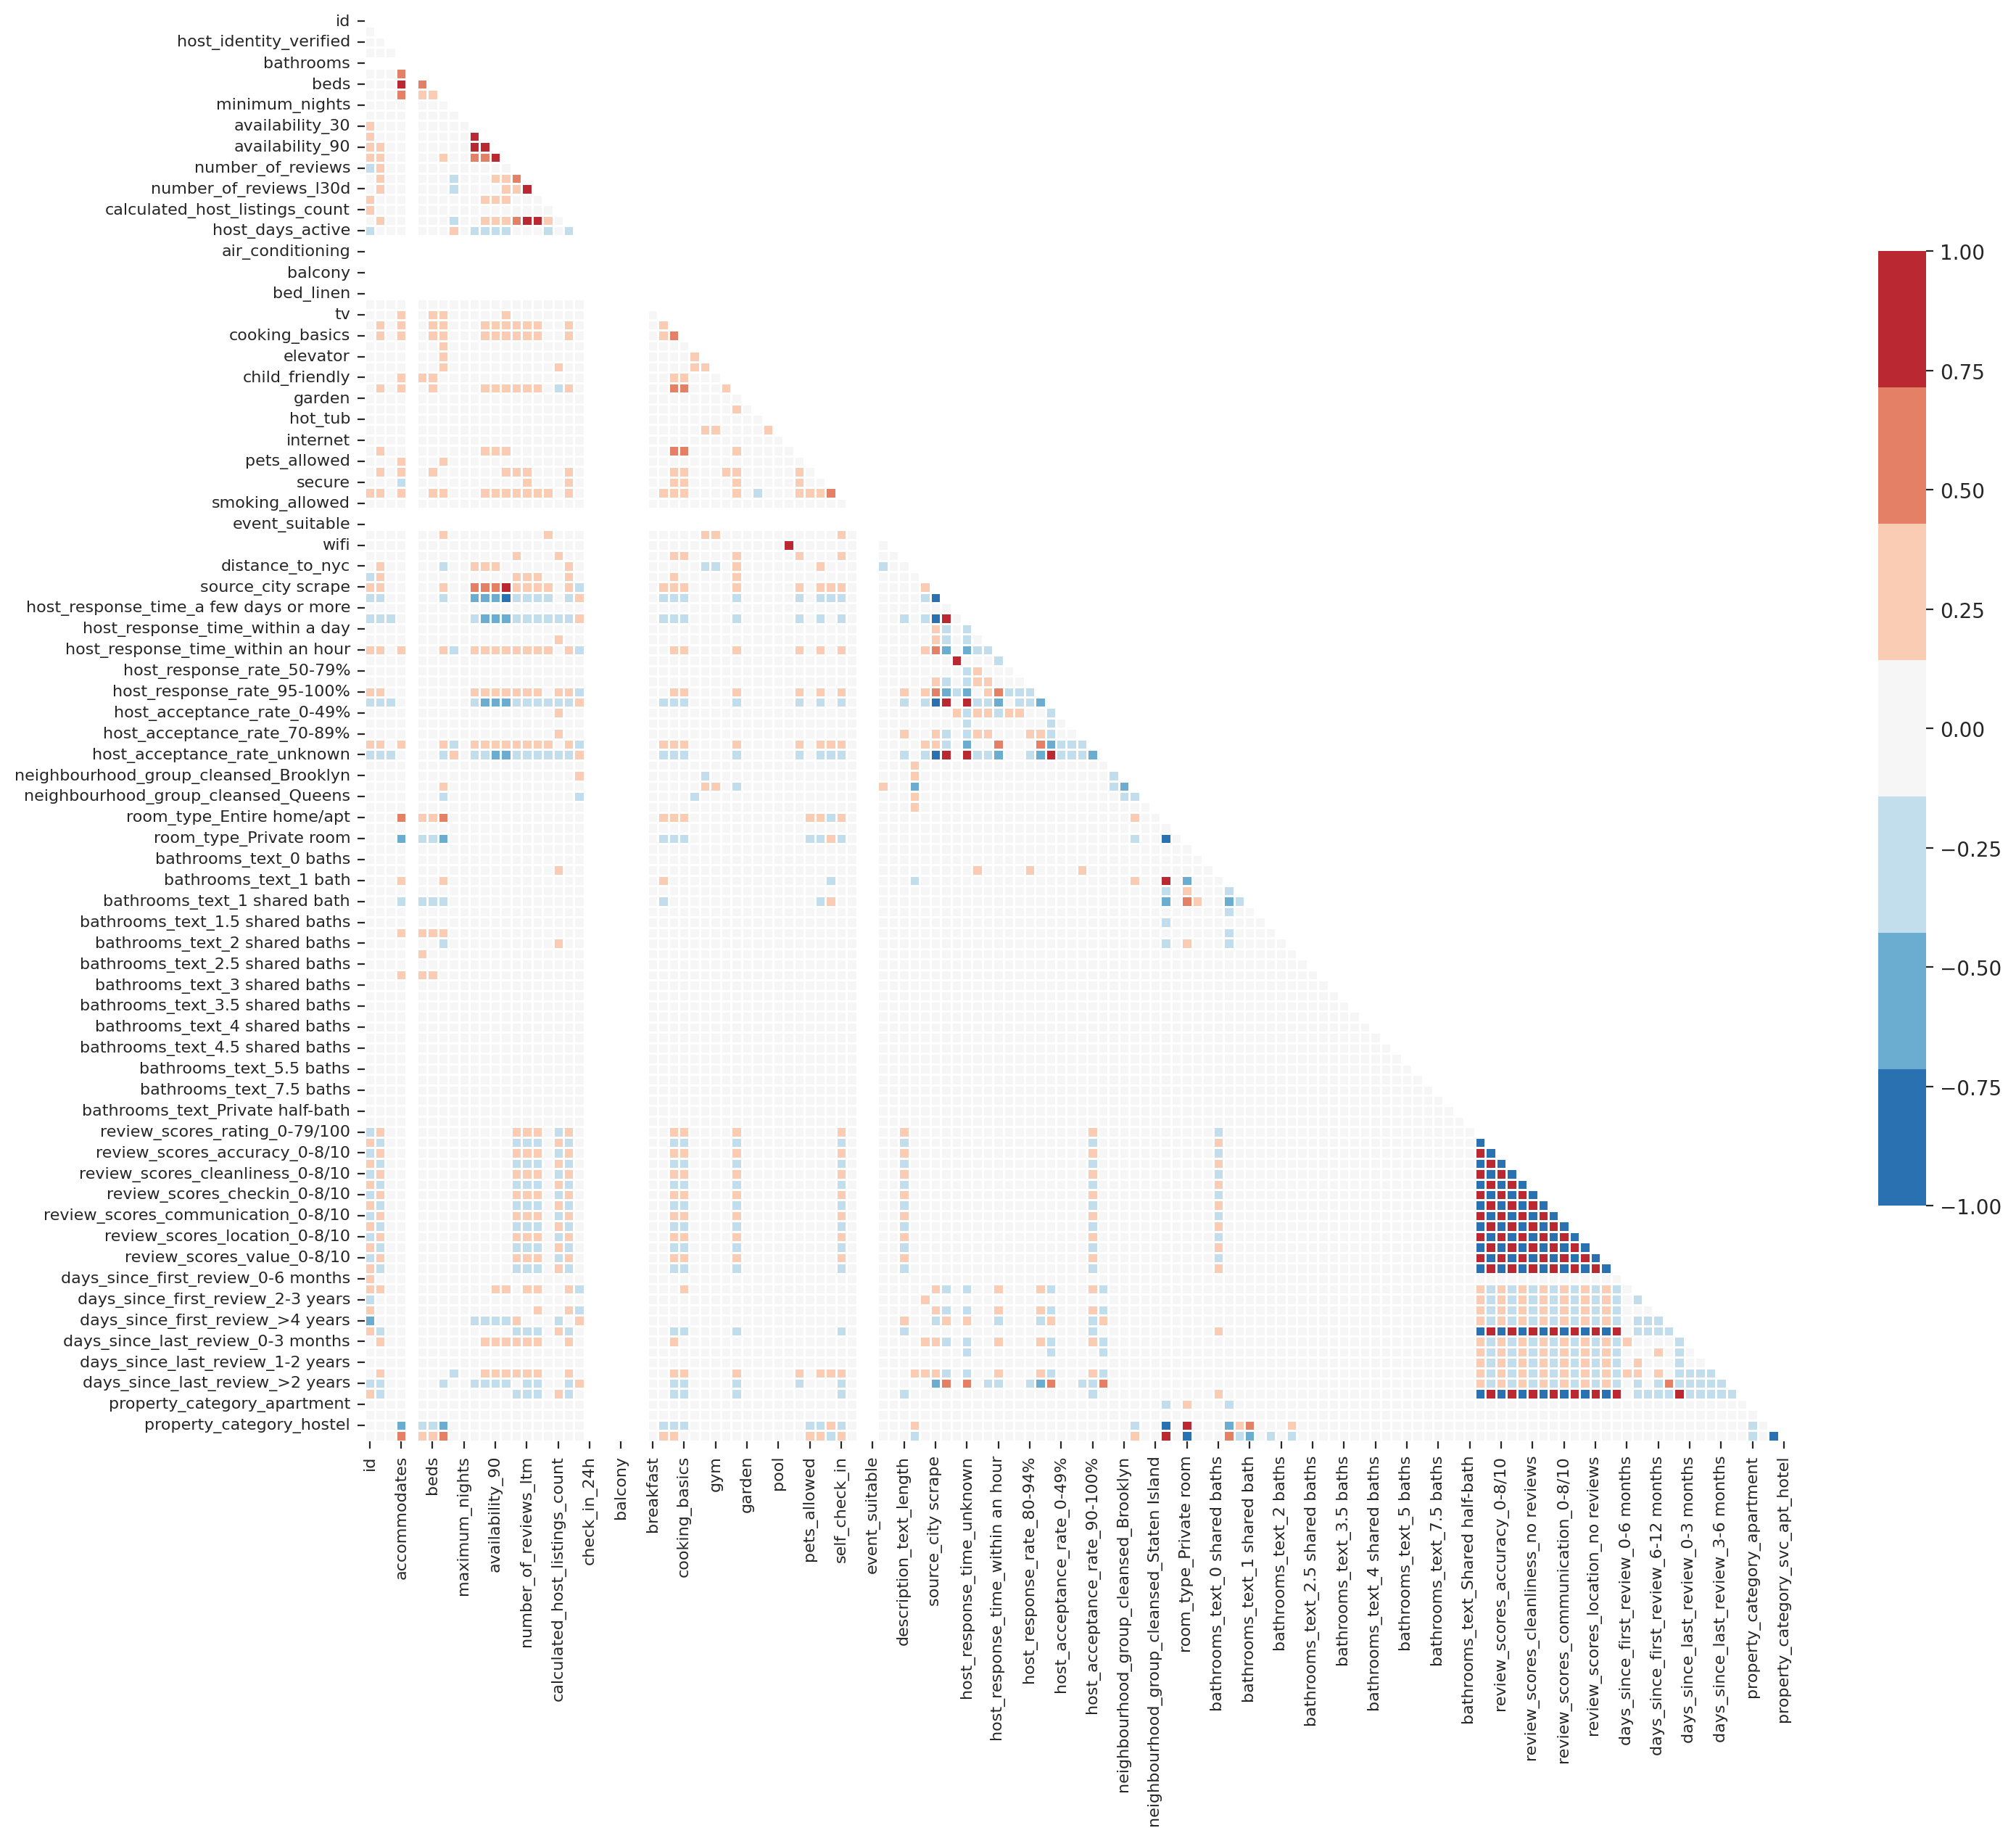

In [95]:
mask = np.zeros_like(listings.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(listings.corr(),
            mask = mask,
            square=True,
            vmin = -1,
            vmax = 1,
            linewidth=0.5,
            cbar_kws = {'shrink':0.5},
            cmap=sns.color_palette("RdBu_r", 7))
ax.tick_params(labelsize=8)
plt.tight_layout()

In [96]:
listings.corr()['availability_30'].sort_values(ascending = False).head()


availability_30       1.000000
availability_60       0.920134
availability_90       0.851361
availability_365      0.543938
source_city scrape    0.484560
Name: availability_30, dtype: float64

In [97]:
listings.corr()['pool'].sort_values(ascending = False).head(3)


pool       1.000000
gym        0.163060
hot_tub    0.151926
Name: pool, dtype: float64

In [98]:
listings.corr()['number_of_reviews'].sort_values(ascending = False).head(3)


number_of_reviews        1.000000
number_of_reviews_ltm    0.650617
reviews_per_month        0.626147
Name: number_of_reviews, dtype: float64

In [99]:
listings.corr()['review_scores_rating_no reviews'].sort_values(ascending = False).head(10)


review_scores_rating_no reviews           1.000000
days_since_first_review_no reviews        0.999928
days_since_last_review_no reviews         0.999928
review_scores_cleanliness_no reviews      0.977875
review_scores_communication_no reviews    0.977475
review_scores_accuracy_no reviews         0.977199
review_scores_checkin_no reviews          0.976923
review_scores_value_no reviews            0.976744
review_scores_location_no reviews         0.976703
calculated_host_listings_count            0.342493
Name: review_scores_rating_no reviews, dtype: float64

In [100]:
listings.corr()['host_response_time_unknown'].sort_values(ascending = False).head(3)


host_response_rate_unknown      1.000000
host_response_time_unknown      1.000000
host_acceptance_rate_unknown    0.877463
Name: host_response_time_unknown, dtype: float64

In [101]:
listings.corr()[['price']].sort_values('price',ascending=False).head(10)


price
price                                   1.000000
property_category_svc_apt_hotel         0.578799
room_type_Entire home/apt               0.527490
accommodates                            0.486424
beds                                    0.380819
bedrooms                                0.352167
bathrooms_text_1 bath                   0.287028
neighbourhood_group_cleansed_Manhattan  0.276827
tv                                      0.261199
coffee_machine                          0.233386

In [102]:
listings.corr()[['price']].sort_values('price',ascending=True).head(10)


price
property_category_hostel            -0.562918
room_type_Private room              -0.516524
bathrooms_text_1 shared bath        -0.396914
distance_to_nyc                     -0.267578
source_previous scrape              -0.171515
bathrooms_text_2 shared baths       -0.159648
neighbourhood_group_cleansed_Queens -0.156628
host_acceptance_rate_unknown        -0.151970
days_since_last_review_>2 years     -0.145006
host_response_time_unknown          -0.137464

In [103]:
corr_price = abs(listings.corr()['price'])
features_drop = corr_price[corr_price < 0.05]
features_drop = features_drop.to_frame().index.tolist()
features_drop

['maximum_nights',
 'number_of_reviews',
 'calculated_host_listings_count',
 'host_days_active',
 'breakfast',
 'parking',
 'hot_tub',
 'internet',
 'smoking_allowed',
 'wifi',
 'sentiment_compound',
 'host_response_time_a few days or more',
 'host_response_time_within a day',
 'host_response_rate_0-49%',
 'host_response_rate_50-79%',
 'host_response_rate_80-94%',
 'host_acceptance_rate_0-49%',
 'host_acceptance_rate_50-69%',
 'host_acceptance_rate_70-89%',
 'neighbourhood_group_cleansed_Staten Island',
 'bathrooms_text_0 baths',
 'bathrooms_text_1 private bath',
 'bathrooms_text_2.5 shared baths',
 'bathrooms_text_3 shared baths',
 'bathrooms_text_3.5 baths',
 'bathrooms_text_3.5 shared baths',
 'bathrooms_text_4 baths',
 'bathrooms_text_4 shared baths',
 'bathrooms_text_4.5 baths',
 'bathrooms_text_4.5 shared baths',
 'bathrooms_text_5 baths',
 'bathrooms_text_5.5 baths',
 'bathrooms_text_6 shared baths',
 'bathrooms_text_7.5 baths',
 'bathrooms_text_Half-bath',
 'bathrooms_text_Priv

In [104]:
listings.columns = listings.columns.str.replace(' ', '_')

In [105]:
listings.columns= listings.columns.str.lower()


In [106]:
pd.set_option('display.max_columns', None)


In [107]:
listings.columns.tolist()

['id',
 'host_is_superhost',
 'host_identity_verified',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'instant_bookable',
 'calculated_host_listings_count',
 'reviews_per_month',
 'host_days_active',
 'check_in_24h',
 'air_conditioning',
 'bbq',
 'balcony',
 'nature_and_views',
 'bed_linen',
 'breakfast',
 'tv',
 'coffee_machine',
 'cooking_basics',
 'washer',
 'elevator',
 'gym',
 'child_friendly',
 'parking',
 'garden',
 'host_greeting',
 'hot_tub',
 'pool',
 'internet',
 'long_term_stays',
 'pets_allowed',
 'private_entrance',
 'secure',
 'self_check_in',
 'smoking_allowed',
 'wheelchair_access',
 'event_suitable',
 'building_staff',
 'wifi',
 'description_text_length',
 'distance_to_nyc',
 'sentiment_compound',
 'source_city_scrape',
 'source_previous_scrape',
 'host_respon

In [108]:
listings.to_csv('/content/drive/MyDrive/RegressionProject/listings_final_dataset.csv',index = False)